<div style="border-radius: 10px; padding: 15px; background-color: #ffeacc; font-size: 130%; text-align: left">

<h2 align="left"><font color="#ff620">Problem:</font></h2>
    
Customer Segmentation is the practice of dividing a company's customers into groups that reflect similarities among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximise the value of each customer to both the customer and the business. Benefits include: 
   
 1) Targeted Marketing 
 2) Improved Customer Experience 
 3) Revenue Growth 
 4) Opertional Efficiency 
 5) Competitive Advantage 
 6) Innovation and Product Development. 

This notebook aims to identify these particular clusters/segments within data at Caribbean Airlines with the use of Machine Learning (ML) . Why ML? ML can 
  
 1) Handle Large and Complex Data 
 2) Identify Non-obvious Patterns 
 3) It is automated and scalable 
 4) Real-time adaptability  
 5) Predictive Power



<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Objectives:</font></h2>


- **Data Cleaning & Transformation**: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

    
- **Feature Engineering**: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.

    
- **Data Preprocessing**: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.

    
- **Customer Segmentation using K-Means Clustering**: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

    
- **Cluster Analysis & Evaluation**: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.


<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Table of Contents:</font></h2>
    
* [Step 1 | Setup and Initialization](#setup)
    - [Step 1.1 | Importing Necessary Libraries](#libraries) 
    - [Step 1.2 | Loading the Dataset](#load_dataset)
    - [Step 1.3 | Summary Statistics](#statistics) 
* [Step 2 | Data Cleaning & Transformation](#data_cleaning)
    - [Step 3.1 | Handling Missing Values](#missing_values)
    - [Step 3.2 | Cleaning Data](#cleaning)
* [Step 3 | Feature Engineering](#feature_engineering)
    - [Step 3.1 | RFM Features](#rfm_features)
        - [Step 3.1.1 | Recency (R)](#recency) 
        - [Step 3.1.2 | Frequency (F)](#frequency)
        - [Step 3.1.3 | Monetary (M)](#monetary)
    - [Step 3.2 | Behavioral Features](#behaviroal_features)
    - [Step 3.3 | Seasonality & Trends](#seasonality_trends) 
* [Step 4 | Outlier Detection and Treatment](#outlier_detection)
* [Step 5 | Correlation Analysis](#correlation)
* [Step 6 | Feature Scaling](#scaling)
* [Step 7 | Dimensionality Reduction](#pca)
* [Step 8 | K-Means Clustering](#kmeans) 
    - [Step 8.1 | Determining the Optimal Number of Clusters](#optimal_k) 
        - [Step 8.1.1 | Elbow Method](#elbow)
        - [Step 8.1.2 | Calinski-Harabasz Index](#Calinski-Harabasz_Index)
    - [Step 8.2 | Clustering Model - K-means](#kmeans_model)
* [Step 9 | Clustering Evaluation](#evaluation)  
    - [Step 9.1 | 3D Visualization of Top Principal Components](#3d_visualization)
    - [Step 9.2 | Cluster Distribution Visualization](#cluster_distribution) 
    - [Step 9.3 | Evaluation Metrics](#evaluations_metrics)
* [Step 10 | Cluster Analysis](#cluster)
    - [Step 10.1 | Radar Chart Approach](#radar_chart)
    - [Step 10.2 | Histogram Chart Approach](#histogram)
* [Step 11 | Gaussian_Mixture Clustering](#gaussian_mixture) 
    - [Step 11.1 | Determining the Optimal Number of Clusters](#k) 
        - [Step 11.1.1 | Bayesian Information Criterion (BIC)](#bic)
        - [Step 11.1.2 | Akaike Information Criterion (AIC)](#aic)
    - [Step 11.2 | Clustering Model - Gaussian_Mixture](#gaussian_mixture_model)
* [Step 12 | Gaussian Clustering Evaluation](#gaussian_evaluation)
    - [Step 12.1 | Gaussian Clusters Distribution Visualization](#gaussian_cluster_distribution) 
    - [Step 12.2 | Gaussian Evaluation Metrics](#gaussian_evaluations_metrics)
* [Step 13 | Gaussian Cluster Analysis](#gaussian_cluster)
    - [Step 13.1 | Gaussian Radar Chart Approach](#gaussian_radar_chart)
    - [Step 13.2 | Gaussian Histogram Chart Approach](#gaussian_histogram)
* [Step 11 | Results](#results)
  

<h2 align="left"><font color=#ff6200>Let's get started:</font></h2>

<a id="setup"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 1 | Setup and Initialization</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="libraries"></a>
# <b><span style='color:#fcc36d'>Step 1.1 |</span><span style='color:#ff6200'> Importing Necessary Libraries</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [35]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter
from datetime import datetime
from sklearn import metrics
from sklearn.mixture import GaussianMixture

%matplotlib inline

In [36]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [37]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

<a id="load_dataset"></a>
# <b><span style='color:#fcc36d'>Step 1.2 |</span><span style='color:#ff6200'> Loading the Dataset</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [4]:
#Flight Flown has 4,559,225 initial rows [3,159,177 initial rows used previously]

flights_data = pd.read_csv("/Users/riadmohammed/Desktop/Customer Segmentation 2024/Data/data_updated.csv", encoding="utf-8") #FLOWN.FT_FLOWN
distance_data = pd.read_csv("/Users/riadmohammed/Desktop/Customer Segmentation 2024/Data/flight_distances.csv", encoding="utf-8")

In [5]:
flights_data.shape

(4564619, 12)

In [6]:
distance_data.shape

(201, 3)

In [7]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4564619 entries, 0 to 4564618
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   YYYYMM          object 
 1   PNR_NUMBER      object 
 2   BOOKING_DATE    object 
 3   FLIGHT_DATE     object 
 4   FLIGHT_FROM     object 
 5   FLIGHT_TO       object 
 6   FLIGHT_NO       int64  
 7   PASSENGER_NAME  object 
 8   GENDER          object 
 9   DOB             object 
 10  REVENUE         float64
 11  RBD             object 
dtypes: float64(1), int64(1), object(10)
memory usage: 417.9+ MB


In [8]:
#This line checks the total null values per column

flights_data.isnull().sum()

YYYYMM                 0
PNR_NUMBER         52054
BOOKING_DATE           0
FLIGHT_DATE            0
FLIGHT_FROM            2
FLIGHT_TO              2
FLIGHT_NO              0
PASSENGER_NAME       692
GENDER            455667
DOB               427754
REVENUE                0
RBD                  590
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences:</font></h3>
    
The dataset consists of 4,559,225 entries and 12 initial columns. Here is a brief overview of each column:

- __`YYYYMM`__: Year and month of a flight.
   
    
- __`PNR_NUMBER`__: Passenger Name Record. 

    
- __`BOOKING_DATE`__: Date in which flight was booked.

    
- __`FLIGHT_DATE`__: Date of flight.
   

- __`FLIGHT_FROM`__: Three(3) letter representation of the country/city flight is leaving from.

    
- __`FLIGHT_TO`__: Three(3) letter representation of the country/city flight is travelling to.

    
- __`FLIGHT_NO`__: Flight number.

    
- __`PASSENGER_NAME`__: Name of customer.
    
    
- __`GENDER`__: Gender of customer.
    
    
- __`DOB`__: Date of birth of customer.
    
    
- __`REVENUE`__: Amount of money generated.
    

- __`RBD`__: Reservation Booking Designator,i.e, the booking class of a flight.

From a preliminary overview, it seems that there are missing values in the `PNR_NUMBER` , `PASSENGER_NAME` , `GENDER` , `DOB` and `RBD` columns which need to be addressed. 

The next steps would include deeper data cleaning and preprocessing to handle missing values, potentially erroneous data, and to create new features that can help in achieving the project goals.

<a id="statistics"></a>
# <b><span style='color:#fcc36d'>Step 1.3 |</span><span style='color:#ff6200'> Summary Statistics</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [9]:
# Summary statistics for numerical variables
flights_data.describe().T

count        mean         std  min     25%    50%      75%  \
FLIGHT_NO  4564619.0  845.107982  713.477099  2.0  442.00  526.0  1509.00   
REVENUE    4564619.0  162.499587  171.217987  0.0   29.46  116.0   244.99   

               max  
FLIGHT_NO   9999.0  
REVENUE    25000.0

In [10]:
# Summary statistics for categorical variables
flights_data.describe(include='object').T

count   unique               top     freq
YYYYMM          4564619       35           2023-08   208775
PNR_NUMBER      4512565  1970501            3ARZO9      300
BOOKING_DATE    4564619     1427        2023-03-14     8872
FLIGHT_DATE     4564619     1004        2023-12-22     8141
FLIGHT_FROM     4564617       35               POS  1829213
FLIGHT_TO       4564617       48               POS  1804141
PASSENGER_NAME  4563927  1372030  ALEXANDER/GLYNIS      810
GENDER          4108952        2                 F  2165941
DOB             4136865    33988        1979-08-25     5982
RBD             4564029       25                 W  1251805

<a id="data_cleaning"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 2 |  Data Cleaning & Transformation</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="missing_values"></a>
# <b><span style='color:#fcc36d'>Step 2.1 |</span><span style='color:#ff6200'> Handling Missing Values</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

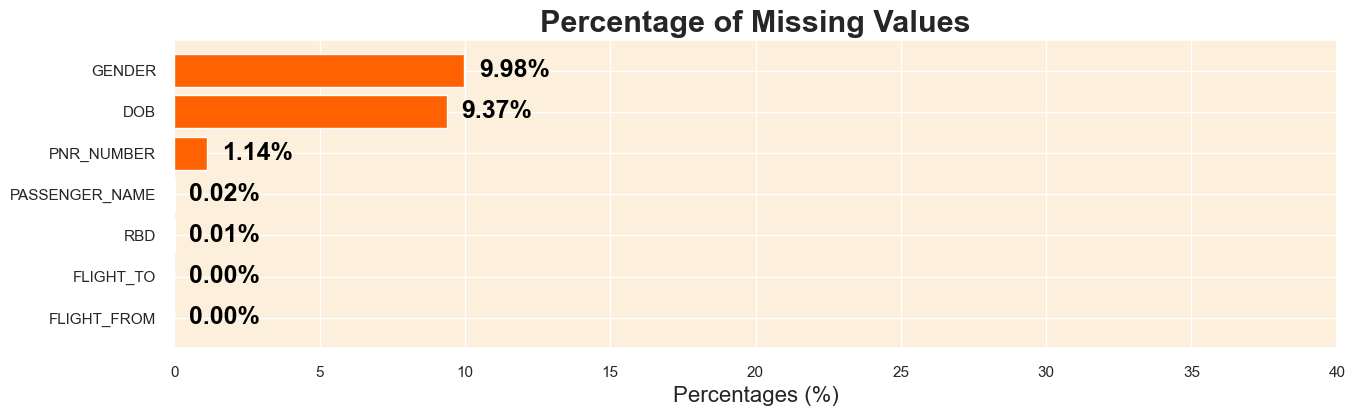

In [11]:
# Calculating the percentage of missing values for each column
missing_data = flights_data.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / flights_data.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [12]:
flights_data.shape

(4564619, 12)

In [13]:
#columns_to_exclude = ['COUNTRY']
#flights_data = flights_data.drop(columns=columns_to_exclude)

<a id="cleaning"></a>
# <b><span style='color:#fcc36d'>Step 2.2 |</span><span style='color:#ff6200'> Data Cleaning</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [14]:
#Ensures no high ages are obtained since there are errors in inputing the DOB entries
#Age cap set to 100 years
flights_data = flights_data[flights_data['DOB'] > '1913/01/01']

In [15]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = flights_data[flights_data.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['YYYYMM', 'PNR_NUMBER', 'BOOKING_DATE', 'FLIGHT_DATE', 'PASSENGER_NAME'])

duplicate_rows_sorted.head()

YYYYMM PNR_NUMBER BOOKING_DATE FLIGHT_DATE FLIGHT_FROM FLIGHT_TO  \
1954010  2021-08     3Q7IW7   2021-08-05  2021-08-08         POS       MIA   
1954011  2021-08     3Q7IW7   2021-08-05  2021-08-08         POS       MIA   
4551143  2022-01     2JXNIF   2022-01-07  2022-01-15         JFK       KIN   
4551146  2022-01     2JXNIF   2022-01-07  2022-01-15         JFK       KIN   
2539613  2022-04     43W2GH   2022-02-04  2022-04-15         JFK       MBJ   

         FLIGHT_NO  PASSENGER_NAME GENDER         DOB  REVENUE RBD  
1954010        484      SINGH/RYAN      M  2007-01-04    819.0   J  
1954011        484      SINGH/RYAN      M  2007-01-04    819.0   J  
4551143         14   MYRIE/PATRICK      M  1971-01-06    175.0   V  
4551146         14   MYRIE/PATRICK      M  1971-01-06    175.0   V  
2539613         10  SPELMAN/DECLAN      M  2007-06-06     96.0   X

In [16]:
duplicate_rows.shape

(42, 12)

In [17]:
# Displaying the number of duplicate rows
print(f"The dataset contains {flights_data.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
flights_data.drop_duplicates(inplace=True)

The dataset contains 21 duplicate rows that need to be removed.


In [18]:
flights_data.shape

(4136636, 12)

In [19]:
# Displaying the number of duplicate rows
print(f"The dataset contains {flights_data.duplicated().sum()} duplicate rows that need to be removed.")


The dataset contains 0 duplicate rows that need to be removed.


### Convert 'DOB' column to datetime and Calculate Age

In [20]:
# Convert 'DOB' column to datetime
flights_data['DOB'] = pd.to_datetime(flights_data['DOB'])

# Calculate age based on current date
current_date = datetime.now()
flights_data['AGE'] = flights_data.apply(lambda row: (current_date - row['DOB']).days // 365 if pd.notnull(row['DOB']) else None, axis=1)

# Set age to 1 if less than 1 year
flights_data['AGE'] = flights_data['AGE'].apply(lambda age: 1 if age < 1 else age)

### Merging flight from and flight to, creating the flight leg

In [21]:
#Merging flight from and flight to, creating the flight leg

flights_data['FLIGHT_LEG'] = flights_data['FLIGHT_FROM'] + flights_data['FLIGHT_TO']
flights_data.drop(['FLIGHT_FROM', 'FLIGHT_TO'], axis=1, inplace=True)

### Convert YYYYMM to string to extract the month of travel

In [22]:
# Convert 'YYYYMM' to string format to perform string manipulation
flights_data['YYYYMM'] = flights_data['YYYYMM'].astype(str)

# Extract the month part (last two characters) and store it in a new column 'MM'
flights_data['MONTH_OF_TRAVEL'] = flights_data['YYYYMM'].str[-2:]

# Optional: Convert the 'MM' column to numeric if you want it as an integer instead of a string
flights_data['MONTH_OF_TRAVEL'] = pd.to_numeric(flights_data['MONTH_OF_TRAVEL'])

# Optional: Drop the original 'YYYYMM_T' column if you no longer need it
flights_data.drop(columns=['YYYYMM'], inplace=True)

### Dropping all Charter Flights

In [23]:
#Drop all Charter Flights (i.e FLIGHT_NO >= 8000) 

flights_data = flights_data[flights_data['FLIGHT_NO'] < 8000] 

### Drop rows with PNR_NUMBER equal to "UNKNWN"

In [24]:
# Drop rows with PNR_NUMBER equal to "UNKNWN"

flights_data = flights_data[flights_data['PNR_NUMBER'] != 'UNKNWN']

### Combine ORIGIN and DESTINATION to create FLIGHT_LEG

In [25]:
# Combine ORIGIN and DESTINATION to create FLIGHT_LEG
distance_data['FLIGHT_LEG'] = distance_data['ORIGIN'] + distance_data['DESTINATION']

# Drop the ORIGIN and DESTINATION columns
distance_data.drop(['ORIGIN', 'DESTINATION'], axis=1, inplace=True)

### Create new rows with reversed FLIGHT_LEG values and the same distances

In [26]:
#Create new rows with reversed FLIGHT_LEG values and the same distances
reversed_df = distance_data.copy()
reversed_df['FLIGHT_LEG'] = reversed_df['FLIGHT_LEG'].apply(lambda x: x[-3:] + x[:3])

# Concatenate the original DataFrame with the reversed DataFrame
result_df = pd.concat([distance_data, reversed_df], ignore_index=True)

In [27]:
# Convert DataFrame to a dictionary
flight_leg_dict = result_df.set_index('FLIGHT_LEG')['MILES'].to_dict()

In [28]:
# Map FLIGHT_LEG to MILES using the dictionary and create a new column DISTANCE
flights_data['distance_leg'] = flights_data['FLIGHT_LEG'].map(flight_leg_dict)

In [29]:
flights_data.shape

(4124528, 13)

In [30]:
flights_data.head()

PNR_NUMBER BOOKING_DATE FLIGHT_DATE  FLIGHT_NO          PASSENGER_NAME  \
0     4IZYD3   2023-01-23  2023-02-08        600        CARRINGTON/JANET   
1     3995CH   2023-01-21  2023-02-08        600     STUART/ALEXANDER MR   
2     2JLAO3   2023-01-24  2023-02-08        600       L D SHARMA/SUVARN   
3     28XNYN   2021-11-10  2021-11-21        430  CHRISTOPHER/JUDITH MRS   
4     MSZDDA   2021-11-01  2021-11-21        403  DECOURTE/DWAIN MICHAEL   

  GENDER        DOB  REVENUE RBD  AGE FLIGHT_LEG  MONTH_OF_TRAVEL  \
0      F 1937-03-24   355.44   M   87     POSYYZ                2   
1      M 1998-04-26   450.67   M   25     POSYYZ                2   
2      M 1988-05-10   335.00   H   35     POSYYZ                2   
3      F 1961-01-13   113.05   N   63     POSGND               11   
4      M 1986-09-27   148.99   M   37     BGIPOS               11   

   distance_leg  
0        2534.0  
1        2534.0  
2        2534.0  
3         102.0  
4         212.0

## Filter for International and Regional Travel Only

In [31]:
# Filter rows where 'FLIGHT_LEGS_1' is not 'TABPOS' or 'POSTAB'
# and 'TABPOS' or 'POSTAB' is not in 'FLIGHT_LEGS_2'
flights_data = flights_data[~(flights_data['FLIGHT_LEG'].isin(['TABPOS', 'POSTAB']))]

## Finding the top 10 most frequent flight dates

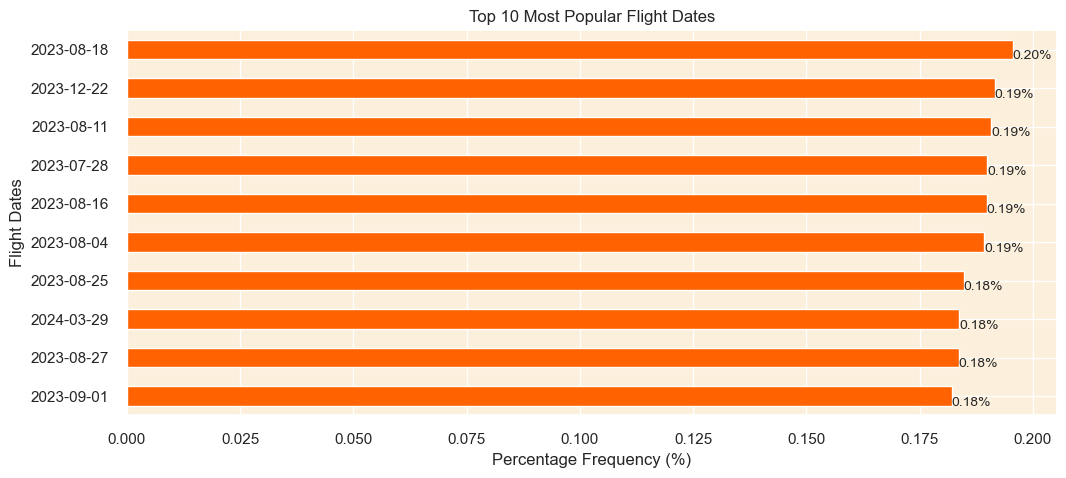

In [32]:
# Finding the top 10 most frequent flight dates
top_10_flight_dates = flights_data['FLIGHT_DATE'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent flight dates
plt.figure(figsize=(12, 5))
top_10_flight_dates.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_flight_dates):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Popular Flight Dates')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Flight Dates')
plt.gca().invert_yaxis()
plt.show()

### Finding the top 10 most frequent Flight leg

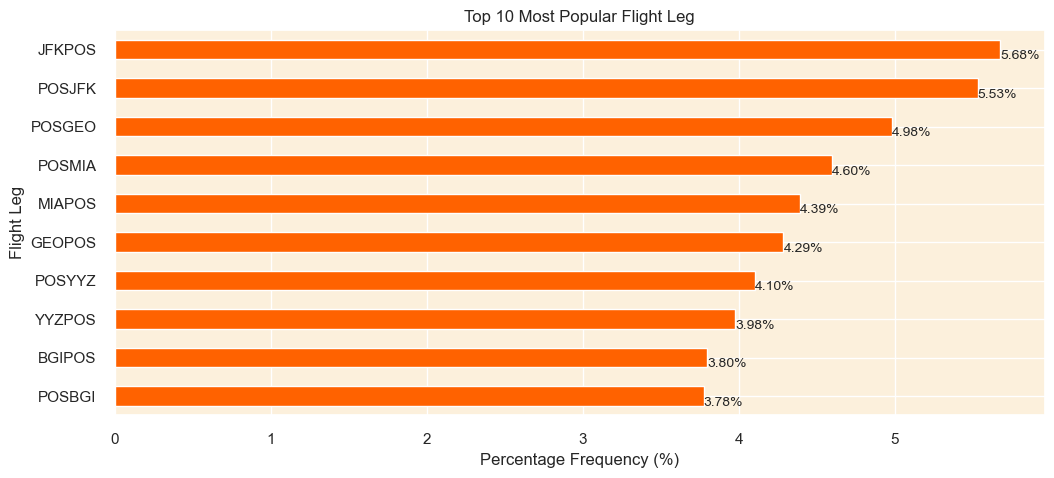

In [33]:
# Finding the top 10 most frequent Flight leg
top_10_flight_leg = flights_data['FLIGHT_LEG'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent Flight leg
plt.figure(figsize=(12, 5))
top_10_flight_leg.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_flight_leg):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Popular Flight Leg')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Flight Leg')
plt.gca().invert_yaxis()
plt.show()

## Finding the top 10 most frequent Month of Travel

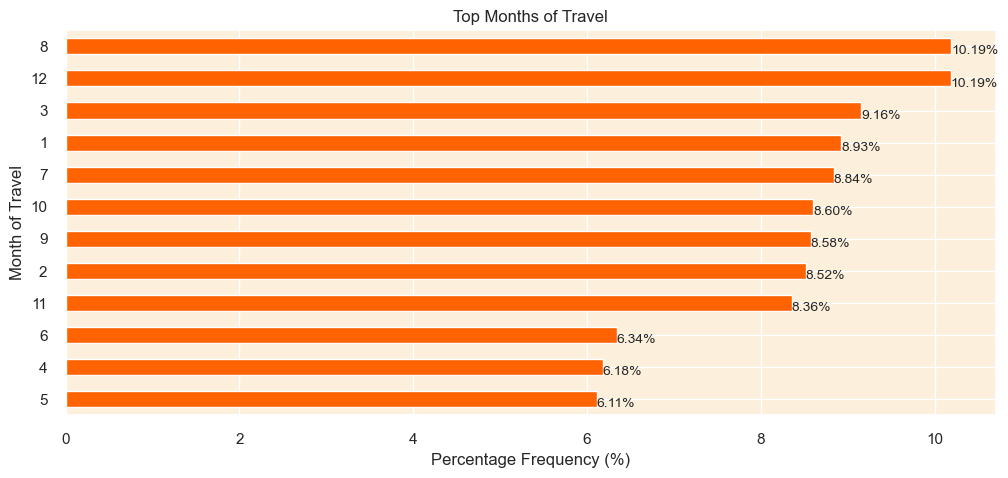

In [34]:
# Finding the top 10 most frequent Month of Travel
top_10_month_of_travel = flights_data['MONTH_OF_TRAVEL'].value_counts(normalize=True).head(13) * 100

# Plotting the top 12 most frequent Flight leg
plt.figure(figsize=(12, 5))
top_10_month_of_travel.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_month_of_travel):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top Months of Travel')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Month of Travel')
plt.gca().invert_yaxis()
plt.show()

## Finding the top 10 most frequent Age

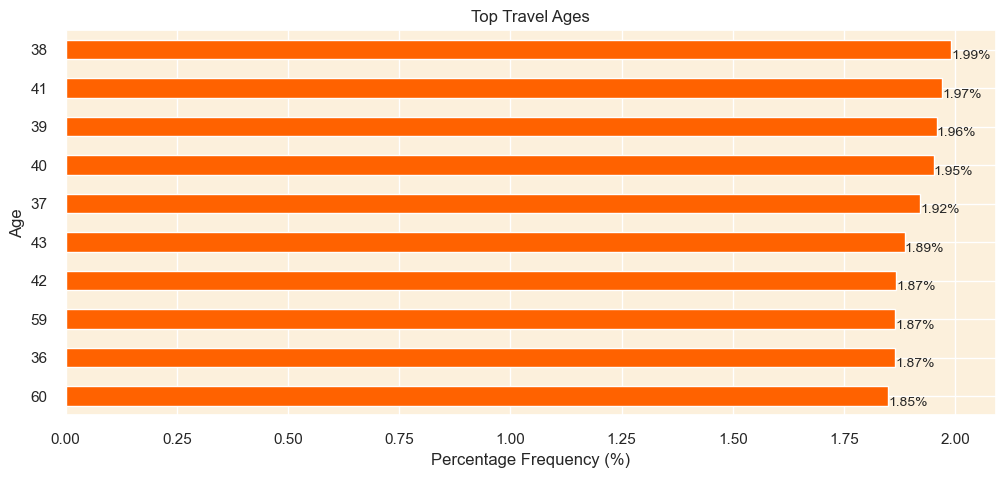

In [35]:
# Finding the top 10 most frequent Age
top_10_age = flights_data['AGE'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent Flight leg
plt.figure(figsize=(12, 5))
top_10_age.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_age):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top Travel Ages')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Age')
plt.gca().invert_yaxis()
plt.show()

In [36]:
df = flights_data.copy()

## Creating an unique Customer ID based on passenger name and dob.

In [37]:
flights_data.insert(0, 'Customer_ID', flights_data['PASSENGER_NAME'] + '_' + flights_data['DOB'].astype(str))

In [38]:
df.insert(0, 'Customer_ID', df['PASSENGER_NAME'] + '_' + df['DOB'].astype(str))

In [39]:
df.head()

Customer_ID PNR_NUMBER BOOKING_DATE FLIGHT_DATE  \
0        CARRINGTON/JANET_1937-03-24     4IZYD3   2023-01-23  2023-02-08   
1     STUART/ALEXANDER MR_1998-04-26     3995CH   2023-01-21  2023-02-08   
2       L D SHARMA/SUVARN_1988-05-10     2JLAO3   2023-01-24  2023-02-08   
3  CHRISTOPHER/JUDITH MRS_1961-01-13     28XNYN   2021-11-10  2021-11-21   
4  DECOURTE/DWAIN MICHAEL_1986-09-27     MSZDDA   2021-11-01  2021-11-21   

   FLIGHT_NO          PASSENGER_NAME GENDER        DOB  REVENUE RBD  AGE  \
0        600        CARRINGTON/JANET      F 1937-03-24   355.44   M   87   
1        600     STUART/ALEXANDER MR      M 1998-04-26   450.67   M   25   
2        600       L D SHARMA/SUVARN      M 1988-05-10   335.00   H   35   
3        430  CHRISTOPHER/JUDITH MRS      F 1961-01-13   113.05   N   63   
4        403  DECOURTE/DWAIN MICHAEL      M 1986-09-27   148.99   M   37   

  FLIGHT_LEG  MONTH_OF_TRAVEL  distance_leg  
0     POSYYZ                2        2534.0  
1     POSYYZ                2        2534.0  
2     POSYYZ                2        2534.0  
3     POSGND               11         102.0  
4     BGIPOS               11         212.0

<a id="feature_engineering"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 | Feature Engineering</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="rfm_features"></a>
# <b><span style='color:#fcc36d'>Step 3.1 |</span><span style='color:#ff6200'> RFM Features</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:

- __Recency (R):__ This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.

    
- __Frequency (F):__ This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.

    
- __Monetary (M):__ This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

    
Together, these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system.

<a id="recency"></a>
## <b><span style='color:#fcc36d'>Step 3.1.1 |</span><span style='color:#ff6200'> Recency (R)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
In this step, we focus on understanding how recently a customer has made a purchase. This is a crucial aspect of customer segmentation as it helps in identifying the engagement level of customers. Here, I am going to define the following feature:

- __Days Since Last Purchase__: This feature represents the number of days that have passed since the customer's last purchase. A lower value indicates that the customer has purchased recently, implying a higher engagement level with the business, whereas a higher value may indicate a lapse or decreased engagement. By understanding the recency of purchases, businesses can tailor their marketing strategies to re-engage customers who have not made purchases in a while, potentially increasing customer retention and fostering loyalty.

In [40]:
df.head()

Customer_ID PNR_NUMBER BOOKING_DATE FLIGHT_DATE  \
0        CARRINGTON/JANET_1937-03-24     4IZYD3   2023-01-23  2023-02-08   
1     STUART/ALEXANDER MR_1998-04-26     3995CH   2023-01-21  2023-02-08   
2       L D SHARMA/SUVARN_1988-05-10     2JLAO3   2023-01-24  2023-02-08   
3  CHRISTOPHER/JUDITH MRS_1961-01-13     28XNYN   2021-11-10  2021-11-21   
4  DECOURTE/DWAIN MICHAEL_1986-09-27     MSZDDA   2021-11-01  2021-11-21   

   FLIGHT_NO          PASSENGER_NAME GENDER        DOB  REVENUE RBD  AGE  \
0        600        CARRINGTON/JANET      F 1937-03-24   355.44   M   87   
1        600     STUART/ALEXANDER MR      M 1998-04-26   450.67   M   25   
2        600       L D SHARMA/SUVARN      M 1988-05-10   335.00   H   35   
3        430  CHRISTOPHER/JUDITH MRS      F 1961-01-13   113.05   N   63   
4        403  DECOURTE/DWAIN MICHAEL      M 1986-09-27   148.99   M   37   

  FLIGHT_LEG  MONTH_OF_TRAVEL  distance_leg  
0     POSYYZ                2        2534.0  
1     POSYYZ                2        2534.0  
2     POSYYZ                2        2534.0  
3     POSGND               11         102.0  
4     BGIPOS               11         212.0

In [41]:
# Convert Booking_date to datetime type
df['BOOKING_DATE'] = pd.to_datetime(df['BOOKING_DATE'])

# Convert Booking_date to datetime and extract only the date
df['BOOKING_DAY'] = df['BOOKING_DATE'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('Customer_ID')['BOOKING_DAY'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['BOOKING_DAY'].max()

# Convert Booking_date to datetime type before subtraction
customer_data['BOOKING_DAY'] = pd.to_datetime(customer_data['BOOKING_DAY'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['BOOKING_DAY']).dt.days

# Remove the Booking_date column
customer_data.drop(columns=['BOOKING_DAY'], inplace=True)

In [42]:
customer_data.head()

Customer_ID  Days_Since_Last_Purchase
0    A ATWELL/SHIRLEY_1961-03-26                        76
1       A BABB/PELHAM_1956-02-08                       762
2      A CAMERON/ERIC_1977-05-12                        67
3  A CHARLES/VERNELLE_1983-10-16                       126
4  A DALBARRY/SIAN MS_1983-01-05                       356

<a id="frequency"></a>
## <b><span style='color:#fcc36d'>Step 3.1.2 |</span><span style='color:#ff6200'> Frequency (F)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, I am going to create a featurea that quantifies the frequency of a customer's engagement with the airline:

- __Total Trips__: This feature represents the total number of trips made by a customer. It helps in understanding the engagement level of a customer with CAL.

    

    
These features will be crucial in segmenting customers based on their buying frequency, which is a key aspect in determining customer segments for targeted marketing and personalized recommendations.

In [43]:
# Calculate the total number of transactions made by each customer
total_trips = df.groupby('Customer_ID')['FLIGHT_DATE'].nunique().reset_index()
total_trips.rename(columns={'FLIGHT_DATE': 'Total_Trips'}, inplace=True)


# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_trips, on='Customer_ID')

In [44]:
customer_data.head()

Customer_ID  Days_Since_Last_Purchase  Total_Trips
0    A ATWELL/SHIRLEY_1961-03-26                        76            2
1       A BABB/PELHAM_1956-02-08                       762            2
2      A CAMERON/ERIC_1977-05-12                        67            2
3  A CHARLES/VERNELLE_1983-10-16                       126            2
4  A DALBARRY/SIAN MS_1983-01-05                       356            1

<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 3.1.3 |</span><span style='color:#ff6200'> Monetary (M)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, I am going to create two features that represent the monetary aspect of customer's transactions:

- __Total Spend__: This feature represents the total amount of money spent by each customer. It is calculated as the sum of all the revenue for a particular customer.
    
- __Average Transaction Value__: This feature is calculated as the __Total Spend__ divided by the __Total Trips__ for each customer. It indicates the average value of a transaction carried out by a customer. This metric is useful in understanding the spending behavior of customers per transaction, which can assist in tailoring marketing strategies and offers to different customer segments based on their average spending patterns.

In [45]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['REVENUE']
total_spend = df.groupby('Customer_ID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_trips, on='Customer_ID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Trips']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='Customer_ID')
customer_data = pd.merge(customer_data, average_transaction_value[['Customer_ID', 'Average_Transaction_Value']], on='Customer_ID')

In [46]:
customer_data.head()

Customer_ID  Days_Since_Last_Purchase  Total_Trips  \
0    A ATWELL/SHIRLEY_1961-03-26                        76            2   
1       A BABB/PELHAM_1956-02-08                       762            2   
2      A CAMERON/ERIC_1977-05-12                        67            2   
3  A CHARLES/VERNELLE_1983-10-16                       126            2   
4  A DALBARRY/SIAN MS_1983-01-05                       356            1   

   Total_Spend  Average_Transaction_Value  
0       557.01                    278.505  
1       250.00                    125.000  
2       608.00                    304.000  
3       253.00                    126.500  
4        99.34                     99.340

<a id="behaviroal_features"></a>
# <b><span style='color:#fcc36d'>Step 3.2 |</span><span style='color:#ff6200'> Behavioral Features</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, we aim to understand and capture the shopping patterns and behaviors of customers. These features will give us insights into the customers' preferences regarding when they like to shop, which can be crucial information for personalizing their shopping experience. Here are the features I am planning to introduce:

- **Average Days Between Purchases**: This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.

- **Favorite Travelling Day**: This denotes the day of the week when the customer travels the most. This information can help in identifying the preferred traveling days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.
    
- **Favorite Travelling Route**: This denotes the flight route a customer travels the most. This information can help in identifying the preferred traveling days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.

- **Favorite Travelling Month**: This denotes the month of the year when the customer travels the most. This information can help in identifying the preferred traveling months of different customer segments, which can be used to optimize marketing strategies and promotions for different months of the year.
    
- **Number in party**: This denotes the size of the party a customer trends/prefers to travel in.
    
- **Average PNR Age**: This denotes the average age of the party a customer trends/prefers to travel in.
    
- **Average Advanced Booking**: This denotes on average the length of time in advance a customer tends to book their ticket.

By including these behavioral features in our dataset, we can create a more rounded view of our customers, which will potentially enhance the effectiveness of the clustering algorithm, leading to more meaningful customer segments.


In [47]:
# Extract day of week and hour from BookingDate

# Convert Booking_date to datetime type
df['FLIGHT_DATE'] = pd.to_datetime(df['FLIGHT_DATE'])

df['Day_Of_Week'] = df['FLIGHT_DATE'].dt.dayofweek
df['Month_Of_Year'] = df['FLIGHT_DATE'].dt.month


In [48]:
# Find the favorite travelling day of the week
favorite_travelling_day = df.groupby(['Customer_ID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_travelling_day = favorite_travelling_day.loc[favorite_travelling_day.groupby('Customer_ID')['Count'].idxmax()][['Customer_ID', 'Day_Of_Week']]

In [49]:
# Find the favorite shopping month of the day
favorite_travelling_month = df.groupby(['Customer_ID', 'Month_Of_Year']).size().reset_index(name='Count')
favorite_travelling_month = favorite_travelling_month.loc[favorite_travelling_month.groupby('Customer_ID')['Count'].idxmax()][['Customer_ID', 'Month_Of_Year']]

In [50]:
# Find the favorite travelling route/distance

favorite_trip_leg = df.groupby(['Customer_ID', 'distance_leg']).size().reset_index(name='Count')
favorite_trip_leg = favorite_trip_leg.loc[favorite_trip_leg.groupby('Customer_ID')['Count'].idxmax()][['Customer_ID', 'distance_leg']]

In [51]:
# # Calculate the average number of days between consecutive purchases

df.sort_values(by=['Customer_ID', 'BOOKING_DATE'], ascending=[True, True], inplace=True)
df['Days_Between_Purchases'] = df.groupby('Customer_ID')['BOOKING_DATE'].diff().dt.days
average_days_between_purchases = df.groupby('Customer_ID')['Days_Between_Purchases'].mean().reset_index()
average_days_between_purchases.rename(columns={'Days_Between_Purchases': 'Average_Days_Between_Purchases'}, inplace=True)

In [52]:
# # Calculate the average number of days between consecutive purchases
# days_between_purchases = df.groupby('PASSENGER_NAME')['BOOKING_DATE'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
# average_days_between_purchases = days_between_purchases.groupby('PASSENGER_NAME').mean().reset_index()
# average_days_between_purchases.rename(columns={'BOOKING_DATE': 'Average_Days_Between_Purchases'}, inplace=True)

In [53]:
# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='Customer_ID')
customer_data = pd.merge(customer_data, favorite_travelling_day, on='Customer_ID')
customer_data = pd.merge(customer_data, favorite_travelling_month, on='Customer_ID')
customer_data = pd.merge(customer_data, favorite_trip_leg, on='Customer_ID')

In [54]:
customer_data['Average_Days_Between_Purchases'].fillna(0, inplace=True)


In [55]:
customer_data.head()

Customer_ID  Days_Since_Last_Purchase  Total_Trips  \
0    A ATWELL/SHIRLEY_1961-03-26                        76            2   
1       A BABB/PELHAM_1956-02-08                       762            2   
2      A CAMERON/ERIC_1977-05-12                        67            2   
3  A CHARLES/VERNELLE_1983-10-16                       126            2   
4  A DALBARRY/SIAN MS_1983-01-05                       356            1   

   Total_Spend  Average_Transaction_Value  Average_Days_Between_Purchases  \
0       557.01                    278.505                             0.0   
1       250.00                    125.000                             0.0   
2       608.00                    304.000                             0.0   
3       253.00                    126.500                             0.0   
4        99.34                     99.340                             0.0   

   Day_Of_Week  Month_Of_Year  distance_leg  
0            4              1        2210.0  
1            1             11        2546.0  
2            3              2        1579.0  
3            2             12         172.0  
4            1              5         528.0

In [56]:
# This code groups the data by 'PNR_NUMBER' and then calculates the number of unique NAME within each group using the nunique function. 
# It creates a new column 'NUMBER_IN_PARTY' in the DataFrame with the count of people in each party with different document numbers.

df['number_in_party'] = df.groupby('PNR_NUMBER')['PASSENGER_NAME'].transform('nunique')

In [57]:
number_in_party = df.groupby(['Customer_ID', 'number_in_party']).size().reset_index(name='Count')
number_in_party = number_in_party.loc[number_in_party.groupby('Customer_ID')['Count'].idxmax()][['Customer_ID', 'number_in_party']]

In [58]:
customer_data = pd.merge(customer_data, number_in_party, on='Customer_ID')

In [59]:
customer_data.head()

Customer_ID  Days_Since_Last_Purchase  Total_Trips  \
0    A ATWELL/SHIRLEY_1961-03-26                        76            2   
1       A BABB/PELHAM_1956-02-08                       762            2   
2      A CAMERON/ERIC_1977-05-12                        67            2   
3  A CHARLES/VERNELLE_1983-10-16                       126            2   
4  A DALBARRY/SIAN MS_1983-01-05                       356            1   

   Total_Spend  Average_Transaction_Value  Average_Days_Between_Purchases  \
0       557.01                    278.505                             0.0   
1       250.00                    125.000                             0.0   
2       608.00                    304.000                             0.0   
3       253.00                    126.500                             0.0   
4        99.34                     99.340                             0.0   

   Day_Of_Week  Month_Of_Year  distance_leg  number_in_party  
0            4              1        2210.0              1.0  
1            1             11        2546.0              1.0  
2            3              2        1579.0              3.0  
3            2             12         172.0              1.0  
4            1              5         528.0              1.0

In [60]:
#Calculating the average age in a PNR

df['pnr_average_age'] = df.groupby('PNR_NUMBER')['AGE'].transform('mean')

In [61]:
pnr_average_age = df.groupby(['Customer_ID', 'pnr_average_age']).size().reset_index(name='Count')
pnr_average_age = pnr_average_age.loc[pnr_average_age.groupby('Customer_ID')['Count'].idxmax()][['Customer_ID', 'pnr_average_age']]

In [62]:
customer_data = pd.merge(customer_data, pnr_average_age, on='Customer_ID')

In [63]:
customer_data.head()

Customer_ID  Days_Since_Last_Purchase  Total_Trips  \
0    A ATWELL/SHIRLEY_1961-03-26                        76            2   
1       A BABB/PELHAM_1956-02-08                       762            2   
2      A CAMERON/ERIC_1977-05-12                        67            2   
3  A CHARLES/VERNELLE_1983-10-16                       126            2   
4  A DALBARRY/SIAN MS_1983-01-05                       356            1   

   Total_Spend  Average_Transaction_Value  Average_Days_Between_Purchases  \
0       557.01                    278.505                             0.0   
1       250.00                    125.000                             0.0   
2       608.00                    304.000                             0.0   
3       253.00                    126.500                             0.0   
4        99.34                     99.340                             0.0   

   Day_Of_Week  Month_Of_Year  distance_leg  number_in_party  pnr_average_age  
0            4              1        2210.0              1.0             63.0  
1            1             11        2546.0              1.0             68.0  
2            3              2        1579.0              3.0             33.0  
3            2             12         172.0              1.0             40.0  
4            1              5         528.0              1.0             41.0

In [64]:
# Calculate the time difference (in days) between the two dates and store it in a new column
df['average_advanced_booking'] = (df['FLIGHT_DATE'] - df['BOOKING_DATE']).dt.days

# Convert specific columns back to string
#df[date_columns] = df[date_columns].apply(lambda x: x.dt.strftime('%Y-%m-%d'))

In [65]:
average_advanced_booking = df.groupby(['Customer_ID', 'average_advanced_booking']).size().reset_index(name='Count')
average_advanced_booking = average_advanced_booking.loc[average_advanced_booking.groupby('Customer_ID')['Count'].idxmax()][['Customer_ID', 'average_advanced_booking']]

In [66]:
customer_data = pd.merge(customer_data, average_advanced_booking, on='Customer_ID')

In [67]:
customer_data.head()

Customer_ID  Days_Since_Last_Purchase  Total_Trips  \
0    A ATWELL/SHIRLEY_1961-03-26                        76            2   
1       A BABB/PELHAM_1956-02-08                       762            2   
2      A CAMERON/ERIC_1977-05-12                        67            2   
3  A CHARLES/VERNELLE_1983-10-16                       126            2   
4  A DALBARRY/SIAN MS_1983-01-05                       356            1   

   Total_Spend  Average_Transaction_Value  Average_Days_Between_Purchases  \
0       557.01                    278.505                             0.0   
1       250.00                    125.000                             0.0   
2       608.00                    304.000                             0.0   
3       253.00                    126.500                             0.0   
4        99.34                     99.340                             0.0   

   Day_Of_Week  Month_Of_Year  distance_leg  number_in_party  pnr_average_age  \
0            4              1        2210.0              1.0             63.0   
1            1             11        2546.0              1.0             68.0   
2            3              2        1579.0              3.0             33.0   
3            2             12         172.0              1.0             40.0   
4            1              5         528.0              1.0             41.0   

   average_advanced_booking  
0                         4  
1                       246  
2                        22  
3                        17  
4                        36

In [68]:
customer_data.shape

(1122936, 12)

<a id="seasonality_trends"></a>
# <b><span style='color:#fcc36d'>Step 3.3 |</span><span style='color:#ff6200'> Seasonality & Trends</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, I will delve into the seasonality and trends in customers' purchasing behaviors, which can offer invaluable insights for tailoring marketing strategies and enhancing customer satisfaction. Here are the features I am looking to introduce:

- __Yearly_Spending_Mean__: This is the average amount a customer spends yearly. It helps us gauge the general spending habit of each customer. A higher mean indicates a customer who spends more, whereas a lower mean might indicate a more budget-conscious customer.

    
- __Yearly_Spending_Std__: This feature indicates the variability in a customer's yearly spending. A higher value signals that the customer's spending fluctuates significantly year-to-year, perhaps indicating sporadic large purchases. In contrast, a lower value suggests more stable, consistent spending habits. Understanding this variability can help in crafting personalized promotions or discounts during periods they are expected to spend more.

    
- __Spending_Trend__: This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfaction. Conversely, a negative trend might signal decreasing interest or satisfaction, highlighting a need for re-engagement strategies. A near-zero value signifies stable spending habits. Recognizing these trends can help in developing strategies to either maintain or alter customer spending patterns, enhancing the effectiveness of marketing campaigns.

By incorporating these detailed insights into our customer segmentation model, we can create more precise and actionable customer groups, facilitating the development of highly targeted marketing strategies and promotions.


In [69]:
df['BOOKING_DATE'] = pd.to_datetime(df['BOOKING_DATE'])


# Extract month and year from BookingDate
df['Year'] = df['BOOKING_DATE'].dt.year
df['Month'] = df['BOOKING_DATE'].dt.month

# Calculate yearly spending for each customer
yearly_spending = df.groupby(['Customer_ID', 'Year'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using yearly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = yearly_spending.groupby('Customer_ID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Yearly_Spending_Mean', 'std': 'Yearly_Spending_Std'}, inplace=True)

# Replace NaN values in Yearly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Yearly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = yearly_spending.groupby('Customer_ID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='Customer_ID')
customer_data = pd.merge(customer_data, spending_trends, on='Customer_ID')



In [70]:
# Display the first few rows of the customer_data dataframe
customer_data.head(60)

Customer_ID  Days_Since_Last_Purchase  \
0                 A ATWELL/SHIRLEY_1961-03-26                        76   
1                    A BABB/PELHAM_1956-02-08                       762   
2                   A CAMERON/ERIC_1977-05-12                        67   
3               A CHARLES/VERNELLE_1983-10-16                       126   
4               A DALBARRY/SIAN MS_1983-01-05                       356   
5            A EDWARDS/JENNIFER MS_1997-10-11                        30   
6                A HALL/KISHANA MS_1994-07-25                       198   
7                 A HALLEY/SEIMONE_1968-12-06                       339   
8                   A HOSTEN/KEITH_1967-11-15                       496   
9                 A JANSSON/RASMUS_2001-07-02                       217   
10        A JONESRICHARDS/JENNIFER_1958-01-30                       598   
11                    A LAYNE/CURT_1969-03-15                       350   
12                  A MARCUS/ALISA_1993-05-19                       345   
13                 A MARTINEAU/JON_1954-06-22                       413   
14               A MCKENZIE/SHARON_1950-08-22                       421   
15               A MOHAMMED/DARIUS_1979-08-29                       107   
16                   A NEIL/STEVEN_1954-06-27                       213   
17                     A RASUL/ADE_1954-06-22                       383   
18              A RIBEIRO/PATRICIA_1967-01-13                       809   
19                  A SIMONS/DONNA_1968-08-03                       436   
20                A SMITH/NADINE A_1968-08-14                       700   
21               A SPOONER/CHARLES_1953-03-18                        78   
22     A WELLER PLUCKNETTE/DEBORAH_1957-11-30                       421   
23                 A WHITE/SHERISE_1989-08-30                       436   
24                     A WHYTE/KIM_1964-03-03                       381   
25                AAB/ALEXANDER MR_1984-08-12                       230   
26  AABIDI/SAYYID MUHAMMAD AMEED M_1999-02-18                        95   
27    AABIDI/SAYYID MUHAMMAD AMEED_1999-02-18                       246   
28    AABIDI/SAYYID MUHAMMAD AQEED_2001-05-10                       801   
29  AABIDI/SAYYID MUHAMMAD TASDEEQ_1970-07-22                       590   
30   AABIDI/SAYYID MUHAMMAD TASDEE_1970-07-22                       646   
31                    AABYE/MARY A_1991-03-22                        52   
32        AADITYA JAGMOHAN/PRIYA D_1996-11-30                       478   
33                 AADITYA/NETRANI_1958-06-30                       478   
34  AAHJEM/SONDRE PILEBERG MR ID31_1997-12-01                       254   
35   AAHJEM/SONDRE PILEBERG MR ID8_1997-12-01                       313   
36   AAHJEM/SONDRE PILEBERG MR ID9_1997-12-01                       150   
37           AAHMES/ISIOMA ALLISON_1993-09-14                       571   
38                   AAHMES/ISIOMA_1993-09-14                        11   
39                       AAKASH/MR_2000-09-17                       437   
40                   AALFS/HENDRIK_1967-02-10                       710   
41                   AALIYAH/MOHAN_2001-10-29                       369   
42                   AALLEYNE/KOBE_2020-11-23                       702   
43        AALSE/BRIAN ERICITO THEO_1972-01-12                       130   
44                   AALSE/BRIANMR_1972-01-12                       131   
45                  AALTO/JANNE MR_1978-08-27                       661   
46         AALTONEN/JARI ANTERO MR_1966-07-10                       545   
47             AALYANI/JAYMAHESHMR_1996-05-08                       340   
48                 AANENSEN/ALISON_1950-06-21                       118   
49   AANENSEN/ANDREW         (CHD)_2017-04-21                       124   
50         AANENSEN/ANNABELLE MISS_2012-03-14                       419   
51              AANENSEN/ANNABELLE_2012-03-14                       337   
52               AANENSEN/BRUCE MR_1947-11-06              

In [71]:
flights_data.head()

Customer_ID PNR_NUMBER BOOKING_DATE FLIGHT_DATE  \
0        CARRINGTON/JANET_1937-03-24     4IZYD3   2023-01-23  2023-02-08   
1     STUART/ALEXANDER MR_1998-04-26     3995CH   2023-01-21  2023-02-08   
2       L D SHARMA/SUVARN_1988-05-10     2JLAO3   2023-01-24  2023-02-08   
3  CHRISTOPHER/JUDITH MRS_1961-01-13     28XNYN   2021-11-10  2021-11-21   
4  DECOURTE/DWAIN MICHAEL_1986-09-27     MSZDDA   2021-11-01  2021-11-21   

   FLIGHT_NO          PASSENGER_NAME GENDER        DOB  REVENUE RBD  AGE  \
0        600        CARRINGTON/JANET      F 1937-03-24   355.44   M   87   
1        600     STUART/ALEXANDER MR      M 1998-04-26   450.67   M   25   
2        600       L D SHARMA/SUVARN      M 1988-05-10   335.00   H   35   
3        430  CHRISTOPHER/JUDITH MRS      F 1961-01-13   113.05   N   63   
4        403  DECOURTE/DWAIN MICHAEL      M 1986-09-27   148.99   M   37   

  FLIGHT_LEG  MONTH_OF_TRAVEL  distance_leg  
0     POSYYZ                2        2534.0  
1     POSYYZ                2        2534.0  
2     POSYYZ                2        2534.0  
3     POSGND               11         102.0  
4     BGIPOS               11         212.0

In [72]:
temp = flights_data[['Customer_ID', 'GENDER', 'AGE']]

In [73]:
temp.shape

(2897079, 3)

In [74]:
customer_data_test = pd.merge(customer_data, temp, on='Customer_ID')

In [75]:
customer_data_test

Customer_ID  Days_Since_Last_Purchase  \
0            A ATWELL/SHIRLEY_1961-03-26                        76   
1            A ATWELL/SHIRLEY_1961-03-26                        76   
2               A BABB/PELHAM_1956-02-08                       762   
3               A BABB/PELHAM_1956-02-08                       762   
4              A CAMERON/ERIC_1977-05-12                        67   
...                                  ...                       ...   
2859468  ZWUESTE/JOHN RICHARD_1961-07-12                       391   
2859469        ZYBIN/ANATOLIY_1961-05-25                       395   
2859470            ZYCH/AISHA_1988-09-25                       525   
2859471   ZYSKOWSKI/KRZYSZTOF_1966-04-22                       530   
2859472   ZYSKOWSKI/KRZYSZTOF_1966-04-22                       530   

         Total_Trips  Total_Spend  Average_Transaction_Value  \
0                  2       557.01                    278.505   
1                  2       557.01                    278.505   
2                  2       250.00                    125.000   
3                  2       250.00                    125.000   
4                  2       608.00                    304.000   
...              ...          ...                        ...   
2859468            2       568.20                    284.100   
2859469            1       376.14                    376.140   
2859470            1       275.00                    275.000   
2859471            1       427.00                    427.000   
2859472            1       427.00                    427.000   

         Average_Days_Between_Purchases  Day_Of_Week  Month_Of_Year  \
0                                   0.0            4              1   
1                                   0.0            4              1   
2                                   0.0            1             11   
3                                   0.0            1             11   
4                                   0.0            3              2   
...                                 ...          ...            ...   
2859468                             0.0            6              7   
2859469                             0.0            4              3   
2859470                             0.0            3              2   
2859471                             0.0            1              1   
2859472                             0.0            1              1   

         distance_leg  number_in_party  pnr_average_age  \
0              2210.0              1.0        63.000000   
1              2210.0              1.0        63.000000   
2              2546.0              1.0        68.000000   
3              2546.0              1.0        68.000000   
4              1579.0              3.0        33.000000   
...               ...              ...              ...   
2859468        2534.0              2.0        61.500000   
2859469         212.0              9.0        39.555556   
2859470         212.0              1.0        35.000000   
2859471         551.0              1.0        58.000000   
2859472         551.0              1.0        58.000000   

         average_advanced_booking  Yearly_Spending_Mean  Yearly_Spending_Std  \
0                               4                557.01                  0.0   
1                               4                557.01                  0.0   
2                             246                250.00                  0.0   
3                             246                250.00                  0.0   
4                              22                608.00                  0.0   
...                           ...                   ...                  ...   
2859468                       132                568.20                  0.0   
2859469                         1                376.14                  0.0   
2859470                       123                275.00                  0.0   
2859471                        77                427.00  

In [76]:
customer_data_test = customer_data_test.drop_duplicates()

In [77]:
customer_data_test

Customer_ID  Days_Since_Last_Purchase  \
0            A ATWELL/SHIRLEY_1961-03-26                        76   
2               A BABB/PELHAM_1956-02-08                       762   
4              A CAMERON/ERIC_1977-05-12                        67   
6          A CHARLES/VERNELLE_1983-10-16                       126   
8          A DALBARRY/SIAN MS_1983-01-05                       356   
...                                  ...                       ...   
2859465      ZWOLSMAN/HUGO.MR_1970-05-21                       487   
2859467  ZWUESTE/JOHN RICHARD_1961-07-12                       391   
2859469        ZYBIN/ANATOLIY_1961-05-25                       395   
2859470            ZYCH/AISHA_1988-09-25                       525   
2859471   ZYSKOWSKI/KRZYSZTOF_1966-04-22                       530   

         Total_Trips  Total_Spend  Average_Transaction_Value  \
0                  2       557.01                    278.505   
2                  2       250.00                    125.000   
4                  2       608.00                    304.000   
6                  2       253.00                    126.500   
8                  1        99.34                     99.340   
...              ...          ...                        ...   
2859465            2       173.59                     86.795   
2859467            2       568.20                    284.100   
2859469            1       376.14                    376.140   
2859470            1       275.00                    275.000   
2859471            1       427.00                    427.000   

         Average_Days_Between_Purchases  Day_Of_Week  Month_Of_Year  \
0                                   0.0            4              1   
2                                   0.0            1             11   
4                                   0.0            3              2   
6                                   0.0            2             12   
8                                   0.0            1              5   
...                                 ...          ...            ...   
2859465                             0.0            2              1   
2859467                             0.0            6              7   
2859469                             0.0            4              3   
2859470                             0.0            3              2   
2859471                             0.0            1              1   

         distance_leg  number_in_party  pnr_average_age  \
0              2210.0              1.0        63.000000   
2              2546.0              1.0        68.000000   
4              1579.0              3.0        33.000000   
6               172.0              1.0        40.000000   
8               528.0              1.0        41.000000   
...               ...              ...              ...   
2859465         551.0              3.0        33.666667   
2859467        2534.0              2.0        61.500000   
2859469         212.0              9.0        39.555556   
2859470         212.0              1.0        35.000000   
2859471         551.0              1.0        58.000000   

         average_advanced_booking  Yearly_Spending_Mean  Yearly_Spending_Std  \
0                               4                557.01                  0.0   
2                             246                250.00                  0.0   
4                              22                608.00                  0.0   
6                              17                253.00                  0.0   
8                              36                 99.34                  0.0   
...                           ...                   ...                  ...   
2859465                        42                173.59                  0.0   
2859467                       132                568.20                  0.0   
2859469                         1                376.14                  0.0   
2859470                       123                275.00  

In [78]:
customer_data_test.shape

(1123676, 17)

In [79]:
customer_data.shape

(1122936, 15)

In [80]:
customer_data_test.describe()

Days_Since_Last_Purchase   Total_Trips   Total_Spend  \
count              1.123676e+06  1.123676e+06  1.123676e+06   
mean               4.147458e+02  2.393298e+00  5.945118e+02   
std                2.632278e+02  2.516095e+00  7.667982e+02   
min                0.000000e+00  1.000000e+00  0.000000e+00   
25%                1.960000e+02  1.000000e+00  2.315700e+02   
50%                3.770000e+02  2.000000e+00  4.020200e+02   
75%                6.190000e+02  2.000000e+00  6.920000e+02   
max                2.637000e+03  1.280000e+02  4.445353e+04   

       Average_Transaction_Value  Average_Days_Between_Purchases  \
count               1.123676e+06                    1.123676e+06   
mean                2.531055e+02                    3.424190e+01   
std                 1.573808e+02                    8.119048e+01   
min                 0.000000e+00                    0.000000e+00   
25%                 1.460000e+02                    0.000000e+00   
50%                 2.259900e+02                    0.000000e+00   
75%                 3.205000e+02                    2.400000e+01   
max                 5.245802e+03                    1.241000e+03   

        Day_Of_Week  Month_Of_Year  distance_leg  number_in_party  \
count  1.123676e+06   1.123676e+06  1.123676e+06     1.123676e+06   
mean   2.553139e+00   6.072124e+00  1.287099e+03     2.260445e+00   
std    1.941907e+00   3.523201e+00  9.125395e+02     4.707611e+00   
min    0.000000e+00   1.000000e+00  3.600000e+01     1.000000e+00   
25%    1.000000e+00   3.000000e+00  3.530000e+02     1.000000e+00   
50%    2.000000e+00   6.000000e+00  1.579000e+03     1.000000e+00   
75%    4.000000e+00   9.000000e+00  2.210000e+03     2.000000e+00   
max    6.000000e+00   1.200000e+01  2.903000e+03     8.100000e+01   

       pnr_average_age  average_advanced_booking  Yearly_Spending_Mean  \
count     1.123676e+06              1.123676e+06          1.123676e+06   
mean      4.381765e+01              3.902803e+01          4.435041e+02   
std       1.714125e+01              5.115987e+01          3.603379e+02   
min       1.000000e+00             -1.000000e+00          0.000000e+00   
25%       3.000000e+01              5.000000e+00          2.200000e+02   
50%       4.200000e+01              2.000000e+01          3.585000e+02   
75%       5.700000e+01              5.200000e+01          5.666900e+02   
max       1.040000e+02              2.410000e+03          1.536500e+04   

       Yearly_Spending_Std  Spending_Trend           AGE  
count         1.123676e+06    1.123676e+06  1.123676e+06  
mean          5.447934e+01    3.340297e+00  4.377164e+01  
std           1.964313e+02    2.180872e+02  1.924699e+01  
min           0.000000e+00   -1.415592e+04  1.000000e+00  
25%           0.000000e+00    0.000000e+00  3.000000e+01  
50%           0.000000e+00    0.000000e+00  4.400000e+01  
75%           0.000000e+00    0.000000e+00  5.900000e+01  
max           1.443376e+04    9.580310e+03  1.060000e+02

In [81]:
customer_data_final = customer_data_test.copy()

In [82]:
#customer_data_final = customer_data_final.drop('Customer_ID', axis=1)

In [83]:
customer_data_final

Customer_ID  Days_Since_Last_Purchase  \
0            A ATWELL/SHIRLEY_1961-03-26                        76   
2               A BABB/PELHAM_1956-02-08                       762   
4              A CAMERON/ERIC_1977-05-12                        67   
6          A CHARLES/VERNELLE_1983-10-16                       126   
8          A DALBARRY/SIAN MS_1983-01-05                       356   
...                                  ...                       ...   
2859465      ZWOLSMAN/HUGO.MR_1970-05-21                       487   
2859467  ZWUESTE/JOHN RICHARD_1961-07-12                       391   
2859469        ZYBIN/ANATOLIY_1961-05-25                       395   
2859470            ZYCH/AISHA_1988-09-25                       525   
2859471   ZYSKOWSKI/KRZYSZTOF_1966-04-22                       530   

         Total_Trips  Total_Spend  Average_Transaction_Value  \
0                  2       557.01                    278.505   
2                  2       250.00                    125.000   
4                  2       608.00                    304.000   
6                  2       253.00                    126.500   
8                  1        99.34                     99.340   
...              ...          ...                        ...   
2859465            2       173.59                     86.795   
2859467            2       568.20                    284.100   
2859469            1       376.14                    376.140   
2859470            1       275.00                    275.000   
2859471            1       427.00                    427.000   

         Average_Days_Between_Purchases  Day_Of_Week  Month_Of_Year  \
0                                   0.0            4              1   
2                                   0.0            1             11   
4                                   0.0            3              2   
6                                   0.0            2             12   
8                                   0.0            1              5   
...                                 ...          ...            ...   
2859465                             0.0            2              1   
2859467                             0.0            6              7   
2859469                             0.0            4              3   
2859470                             0.0            3              2   
2859471                             0.0            1              1   

         distance_leg  number_in_party  pnr_average_age  \
0              2210.0              1.0        63.000000   
2              2546.0              1.0        68.000000   
4              1579.0              3.0        33.000000   
6               172.0              1.0        40.000000   
8               528.0              1.0        41.000000   
...               ...              ...              ...   
2859465         551.0              3.0        33.666667   
2859467        2534.0              2.0        61.500000   
2859469         212.0              9.0        39.555556   
2859470         212.0              1.0        35.000000   
2859471         551.0              1.0        58.000000   

         average_advanced_booking  Yearly_Spending_Mean  Yearly_Spending_Std  \
0                               4                557.01                  0.0   
2                             246                250.00                  0.0   
4                              22                608.00                  0.0   
6                              17                253.00                  0.0   
8                              36                 99.34                  0.0   
...                           ...                   ...                  ...   
2859465                        42                173.59                  0.0   
2859467                       132                568.20                  0.0   
2859469                         1                376.14                  0.0   
2859470                       123                275.00  

In [84]:
customer_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1123676 entries, 0 to 2859471
Data columns (total 17 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Customer_ID                     1123676 non-null  object 
 1   Days_Since_Last_Purchase        1123676 non-null  int64  
 2   Total_Trips                     1123676 non-null  int64  
 3   Total_Spend                     1123676 non-null  float64
 4   Average_Transaction_Value       1123676 non-null  float64
 5   Average_Days_Between_Purchases  1123676 non-null  float64
 6   Day_Of_Week                     1123676 non-null  int64  
 7   Month_Of_Year                   1123676 non-null  int64  
 8   distance_leg                    1123676 non-null  float64
 9   number_in_party                 1123676 non-null  float64
 10  pnr_average_age                 1123676 non-null  float64
 11  average_advanced_booking        1123676 non-null  int64  
 12  

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Customer Dataset Description:</font></h2>

| __Variable__                       | __Description__ |
|     :---                           |       :---      |
| __CustomerID__                     | Identifier uniquely assigned to each customer, used to distinguish individual customers. |
| __Days_Since_Last_Purchase__       | The number of days that have passed since the customer's last purchase. |
| __Total_Trips__                    | The total number of trips travelled by the customer. |
| __Total_Spend__                    | The total amount of money the customer has spent across all transactions. |
| __Average_Transaction_Value__      | The average value of the customer's transactions, calculated as total spend divided by the number of transactions. |
| __Average_Days_Between_Purchases__ | The average number of days between consecutive purchases made by the customer. |
| __Day_Of_Week__                    | The day of the week when the customer prefers to travel, represented numerically (0 for Monday, 6 for Sunday). |
| __Month_Of_Year__                           | The month of the year when the customer prefers to travel, represented numerically(1 for Jan, 12 for Dec.) |
| __distance_leg__         | The average distance customer tends to travel. |
| __number_in_party__              | This denotes the size of the party a customer trends/prefers to travel in. |
| __pnr_average_age__              | This denotes the average age of the party a customer trends/prefers to travel in. |
| __average_advanced_booking__              | This denotes on average the length of time in advance a customer tends to book their ticket. |
| __Yearly_Spending_Mean__          | The average yearly spending of the customer. |
| __Yearly_Spending_Std__           | The standard deviation of the customer's yearly spending, indicating the variability in their spending pattern. |
| __Spending_Trend__                 | A numerical representation of the trend in the customer's spending over time. A positive value indicates an increasing trend, a negative value indicates a decreasing trend, and a value close to zero indicates a stable trend. |
| __GENDER__              | This denotes the gender of the customer (M/F). |
| __AGE__              | This denotes the age of a customer. |   
    

<a id="outlier_detection"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 4 | Outlier Detection and Treatment</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [85]:
test = customer_data_final.copy()

In [86]:
customer_data_final["GENDER"] = customer_data_final['GENDER'].astype("category").cat.codes

In [87]:
#customer_data_final["Customer_ID"] = customer_data_final['Customer_ID'].astype("category").cat.codes

In [88]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data_final['Outlier_Scores'] = model.fit_predict(customer_data_final.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data_final['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data_final['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data_final.head()

Customer_ID  Days_Since_Last_Purchase  Total_Trips  \
0    A ATWELL/SHIRLEY_1961-03-26                        76            2   
2       A BABB/PELHAM_1956-02-08                       762            2   
4      A CAMERON/ERIC_1977-05-12                        67            2   
6  A CHARLES/VERNELLE_1983-10-16                       126            2   
8  A DALBARRY/SIAN MS_1983-01-05                       356            1   

   Total_Spend  Average_Transaction_Value  Average_Days_Between_Purchases  \
0       557.01                    278.505                             0.0   
2       250.00                    125.000                             0.0   
4       608.00                    304.000                             0.0   
6       253.00                    126.500                             0.0   
8        99.34                     99.340                             0.0   

   Day_Of_Week  Month_Of_Year  distance_leg  number_in_party  pnr_average_age  \
0            4              1        2210.0              1.0             63.0   
2            1             11        2546.0              1.0             68.0   
4            3              2        1579.0              3.0             33.0   
6            2             12         172.0              1.0             40.0   
8            1              5         528.0              1.0             41.0   

   average_advanced_booking  Yearly_Spending_Mean  Yearly_Spending_Std  \
0                         4                557.01                  0.0   
2                       246                250.00                  0.0   
4                        22                608.00                  0.0   
6                        17                253.00                  0.0   
8                        36                 99.34                  0.0   

   Spending_Trend  GENDER  AGE  Outlier_Scores  Is_Outlier  
0             0.0       0   63               1           0  
2             0.0       1   68               1           0  
4             0.0       1   46               1           0  
6             0.0       0   40               1           0  
8             0.0       0   41               1           0

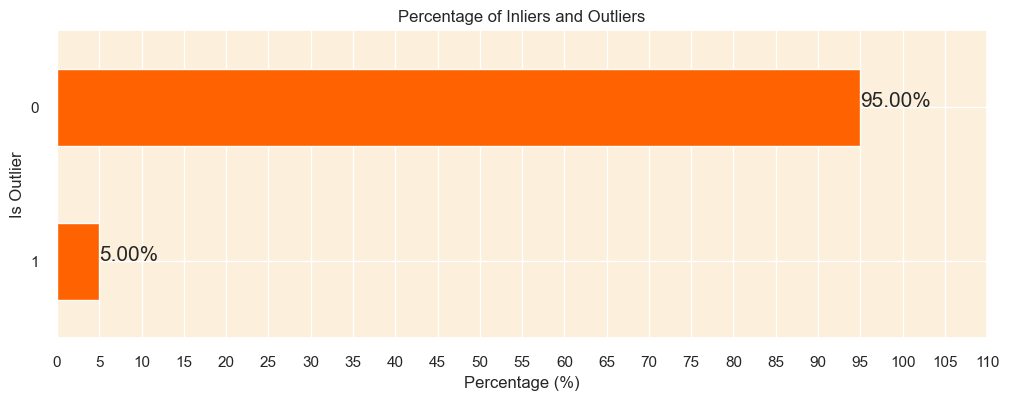

In [89]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data_final['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference: </font></h3>
    
From the above plot, we can observe that about 5% of the customers have been identified as outliers in our dataset. This percentage seems to be a reasonable proportion, not too high to lose a significant amount of data, and not too low to retain potentially noisy data points. It suggests that our isolation forest algorithm has worked well in identifying a moderate percentage of outliers, which will be critical in refining our customer segmentation.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Strategy: </font></h3>

Considering the nature of the project (customer segmentation using clustering), it is crucial to handle these outliers to prevent them from affecting the clusters' quality significantly. Therefore, I will separate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis. 

Let's proceed with the following steps:

- Separate the identified outliers for further analysis and save them as a separate file (optional).
- Remove the outliers from the main dataset to prevent them from influencing the clustering process.
- Drop the `Outlier_Scores` and `Is_Outlier` columns as they were auxiliary columns used for the outlier detection process.

Let's implement these steps:

In [90]:
# Separate the outliers for analysis
outliers_data = customer_data_final[customer_data_final['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data_final[customer_data_final['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

In [91]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

1067492

<a id="correlation"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 5 | Correlation Analysis</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Before we proceed to KMeans clustering, it's essential to check the correlation between features in our dataset. The presence of __multicollinearity__, where __features are highly correlated__, can potentially affect the clustering process by not allowing the model to learn the actual underlying patterns in the data, as the features do not provide unique information. This could lead to clusters that are not well-separated and meaningful.

If we identify multicollinearity, we can utilize dimensionality reduction techniques like PCA. These techniques help in neutralizing the effect of multicollinearity by transforming the correlated features into a new set of uncorrelated variables, preserving most of the original data's variance. This step not only enhances the quality of clusters formed but also makes the clustering process more computationally efficient.

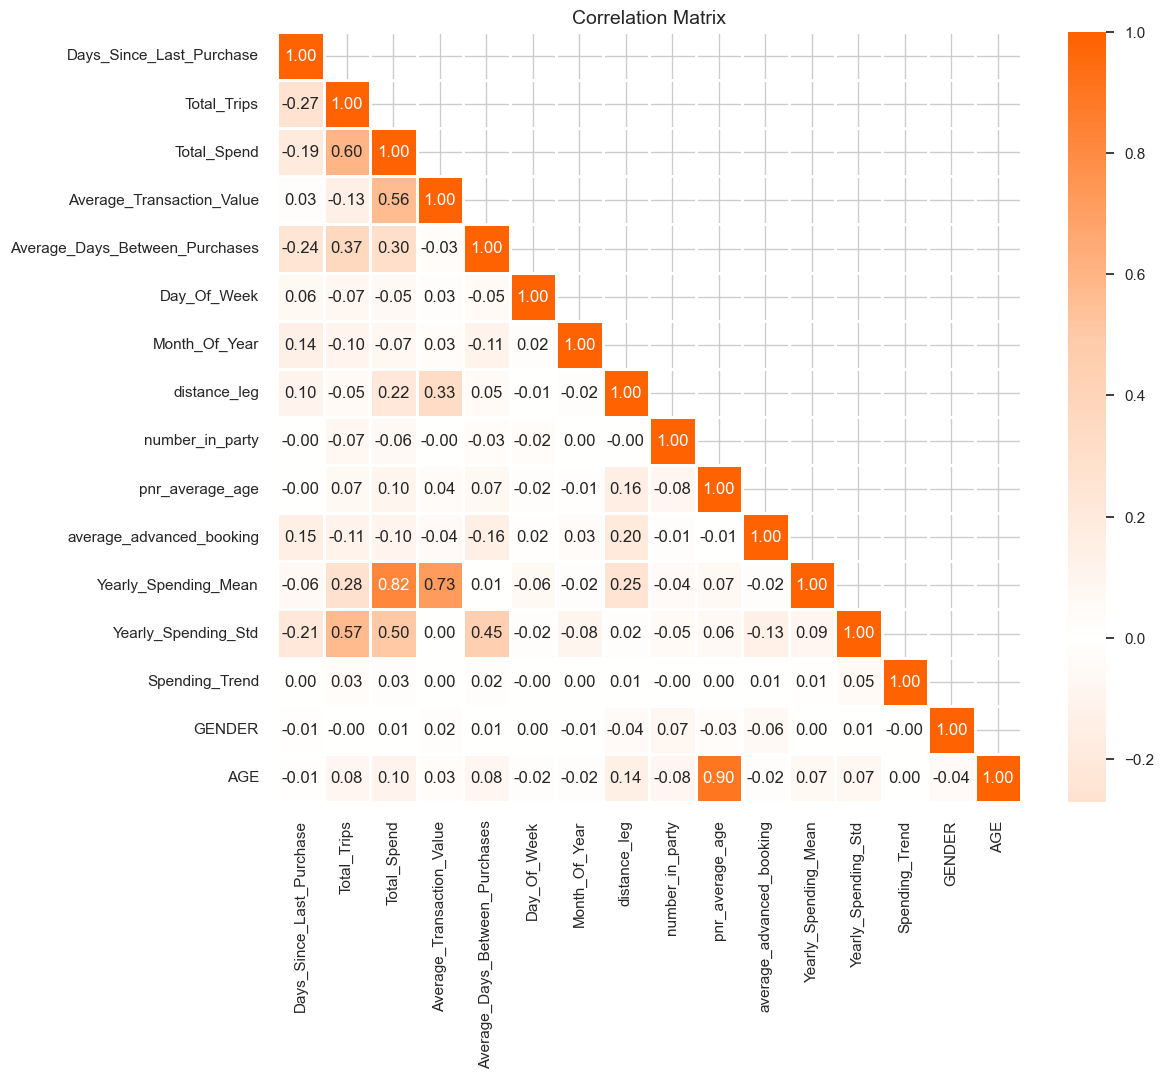

In [92]:
# Reset background style
sns.set_style('whitegrid')


# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['Customer_ID']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

<a id="scaling"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 6 | Feature Scaling</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Before we move forward with the clustering and dimensionality reduction, it's imperative to scale our features. This step holds significant importance, especially in the context of distance-based algorithms like K-means and dimensionality reduction methods like PCA. Here's why:

  - __For K-means Clustering__: K-means relies heavily on the concept of '__distance__' between data points to form clusters. When features are not on a similar scale, features with larger values can disproportionately influence the clustering outcome, potentially leading to incorrect groupings.
  
    
  - __For PCA__: PCA aims to find the directions where the data varies the most. When features are not scaled, those with larger values might dominate these components, not accurately reflecting the underlying patterns in the data.


In [93]:
# # Initialize the StandardScaler
# scaler = StandardScaler()

# # List of columns that don't need to be scaled
# columns_to_exclude = ['Customer_ID','GENDER', 'Day_Of_Week','Month_Of_Year']

# # List of columns that need to be scaled
# columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# # Copy the cleaned dataset
# customer_data_scaled = customer_data_cleaned.copy()

# # Applying the scaler to the necessary columns in the dataset
# customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# # Display the first few rows of the scaled data
# customer_data_scaled.head()

Customer_ID  Days_Since_Last_Purchase  Total_Trips  \
0    A ATWELL/SHIRLEY_1961-03-26                 -1.335239    -0.054330   
1       A BABB/PELHAM_1956-02-08                  1.283833    -0.054330   
2      A CAMERON/ERIC_1977-05-12                 -1.369600    -0.054330   
3  A CHARLES/VERNELLE_1983-10-16                 -1.144345    -0.054330   
4  A DALBARRY/SIAN MS_1983-01-05                 -0.266230    -0.748036   

   Total_Spend  Average_Transaction_Value  Average_Days_Between_Purchases  \
0     0.199966                   0.220835                       -0.392769   
1    -0.619007                  -0.808868                       -0.392769   
2     0.335986                   0.391854                       -0.392769   
3    -0.611005                  -0.798806                       -0.392769   
4    -1.020905                  -0.980994                       -0.392769   

   Day_Of_Week  Month_Of_Year  distance_leg  number_in_party  pnr_average_age  \
0            4              1      1.041520        -0.270130         1.143797   
1            1             11      1.411780        -0.270130         1.437696   
2            3              2      0.346178         0.161529        -0.619600   
3            2             12     -1.204289        -0.270130        -0.208141   
4            1              5     -0.811989        -0.270130        -0.149361   

   average_advanced_booking  Yearly_Spending_Mean  Yearly_Spending_Std  \
0                 -0.700628              0.538993            -0.313648   
1                  4.043971             -0.555833            -0.313648   
2                 -0.347724              0.720828            -0.313648   
3                 -0.445753             -0.545135            -0.313648   
4                 -0.073243             -1.093100            -0.313648   

   Spending_Trend  GENDER       AGE  
0       -0.008412       0  1.019297  
1       -0.008412       1  1.280254  
2       -0.008412       1  0.132044  
3       -0.008412       0 -0.181104  
4       -0.008412       0 -0.128913

In [277]:
df_2024 = pd.read_csv("data_2024.csv")
df_2024

Days_Since_Last_Purchase  Total_Trips  Total_Spend  \
0                              11            1       116.61   
1                             103            2       557.01   
2                             789            2       250.00   
3                              94            2       608.00   
4                             153            2       253.00   
...                           ...          ...          ...   
1092733                       418            2       568.20   
1092734                       422            1       376.14   
1092735                       552            1       275.00   
1092736                       557            1       427.00   
1092737                        17            1       125.00   

         Average_Transaction_Value  Average_Days_Between_Purchases  \
0                          116.610                             0.0   
1                          278.505                             0.0   
2                          125.000                             0.0   
3                          304.000                             0.0   
4                          126.500                             0.0   
...                            ...                             ...   
1092733                    284.100                             0.0   
1092734                    376.140                             0.0   
1092735                    275.000                             0.0   
1092736                    427.000                             0.0   
1092737                    125.000                             0.0   

         Day_Of_Week  Month_Of_Year  distance_leg  RBD  number_in_party  \
0                  2              4         353.0   19              2.0   
1                  4              1        2210.0   15              1.0   
2                  1             11        2546.0    5              1.0   
3                  3              2        1579.0    1              3.0   
4                  2             12         172.0   12              1.0   
...              ...            ...           ...  ...              ...   
1092733            6              7        2534.0    5              2.0   
1092734            4              3         212.0   22              9.0   
1092735            3              2         212.0   22              1.0   
1092736            1              1         551.0    6              1.0   
1092737            3              4         212.0   12              2.0   

         pnr_average_age  average_advanced_booking  Yearly_Spending_Mean  \
0               3.500000                         1                116.61   
1              63.000000                         4                557.01   
2              68.000000                       246                250.00   
3              33.333333                        22                608.00   
4              40.000000                        17                253.00   
...                  ...                       ...                   ...   
1092733        61.500000                       132                568.20   
1092734        39.555556                         1                376.14   
1092735        35.000000                       123                275.00   
1092736        58.000000                        77                427.00   
1092737        31.500000                         1                125.00   

         Yearly_Spending_Std  Spending_Trend  GENDER  AGE  
0                        0.0             0.0       0    3  
1                        0.0             0.0       0   63  
2                        0.0             0.0       1   68  
3                        0.0             0.0       1   47  
4                        0.0             0.0       0   40  
...                      ...             ...     ...  ...  
1092733                  0.0             0.0       1   62  
1092734                  0.0             0.0       1   62  
1092735                  0.0             0.0       0   35

In [175]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['GENDER', 'Day_Of_Week','Month_Of_Year']

# List of columns that need to be scaled
columns_to_scale = df_2024.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
scaled_data = df_2024.copy()

# Applying the scaler to the necessary columns in the dataset
scaled_data[columns_to_scale] = scaler.fit_transform(scaled_data[columns_to_scale])

# Display the first few rows of the scaled data
scaled_data.head()

Days_Since_Last_Purchase  Total_Trips  Total_Spend  \
0                 -1.583834    -0.742123    -0.959448   
1                 -1.242011    -0.068668     0.180569   
2                  1.306800    -0.068668    -0.614155   
3                 -1.275451    -0.068668     0.312561   
4                 -1.056238    -0.068668    -0.606390   

   Average_Transaction_Value  Average_Days_Between_Purchases  Day_Of_Week  \
0                  -0.869861                       -0.393264            2   
1                   0.230054                       -0.393264            4   
2                  -0.812860                       -0.393264            1   
3                   0.403267                       -0.393264            3   
4                  -0.802669                       -0.393264            2   

   Month_Of_Year  distance_leg       RBD  number_in_party  pnr_average_age  \
0              4     -1.005441  1.434755        -0.055601        -2.353663   
1              1      1.036541  0.774214        -0.270716         1.148361   
2             11      1.406011 -0.877140        -0.270716         1.442648   
3              2      0.342685 -1.537682         0.159515        -0.597747   
4             12     -1.204471  0.278807        -0.270716        -0.205363   

   average_advanced_booking  Yearly_Spending_Mean  Yearly_Spending_Std  \
0                 -0.756545             -1.034936            -0.318816   
1                 -0.697894              0.544425            -0.318816   
2                  4.033253             -0.556573            -0.318816   
3                 -0.345991              0.727285            -0.318816   
4                 -0.443742             -0.545815            -0.318816   

   Spending_Trend  GENDER       AGE  
0       -0.011555       0 -2.111126  
1       -0.011555       0  1.022371  
2       -0.011555       1  1.283495  
3       -0.011555       1  0.186772  
4       -0.011555       0 -0.178803

<a id="pca"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 7 | Dimensionality Reduction</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Why We Need Dimensionality Reduction? </font></h3>

- __Multicollinearity Detected__: In the previous steps, we identified that our dataset contains multicollinear features. Dimensionality reduction can help us remove redundant information and alleviate the multicollinearity issue.

    
- __Better Clustering with K-means__: Since K-means is a distance-based algorithm, having a large number of features can sometimes dilute the meaningful underlying patterns in the data. By reducing the dimensionality, we can help K-means to find more compact and well-separated clusters.    
   
    
- __Noise Reduction__: By focusing only on the most important features, we can potentially remove noise in the data, leading to more accurate and stable clusters.    
   
    
- __Enhanced Visualization__: In the context of customer segmentation, being able to visualize customer groups in two or three dimensions can provide intuitive insights. Dimensionality reduction techniques can facilitate this by reducing the data to a few principal components which can be plotted easily.
    
    
- __Improved Computational Efficiency__: Reducing the number of features can speed up the computation time during the modeling process, making our clustering algorithm more efficient.


Let's proceed to select an appropriate dimensionality reduction method to our data.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Which Dimensionality Reduction Method? </font></h3>
  
    
In this step, we are considering the application of dimensionality reduction techniques to simplify our data while retaining the essential information. Among various methods such as KernelPCA, ICA, ISOMAP, TSNE, and UMAP, I am starting with **PCA (Principal Component Analysis)**. Here's why:

PCA is an excellent starting point because it works well in capturing linear relationships in the data, which is particularly relevant given the multicollinearity we identified in our dataset. It allows us to reduce the number of features in our dataset while still retaining a significant amount of the information, thus making our clustering analysis potentially more accurate and interpretable. Moreover, it is computationally efficient, which means it won't significantly increase the processing time.

However, it's essential to note that we are keeping our options open. After applying PCA, if we find that the first few components do not capture a significant amount of variance, indicating a loss of vital information, we might consider exploring other non-linear methods. These methods can potentially provide a more nuanced approach to dimensionality reduction, capturing complex patterns that PCA might miss, albeit at the cost of increased computational time and complexity.



<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Methodology </font></h3>

I will apply PCA on all the available components and plot the cumulative variance explained by them. This process will allow me to visualize how much variance each additional principal component can explain, thereby helping me to pinpoint the optimal number of components to retain for the analysis:

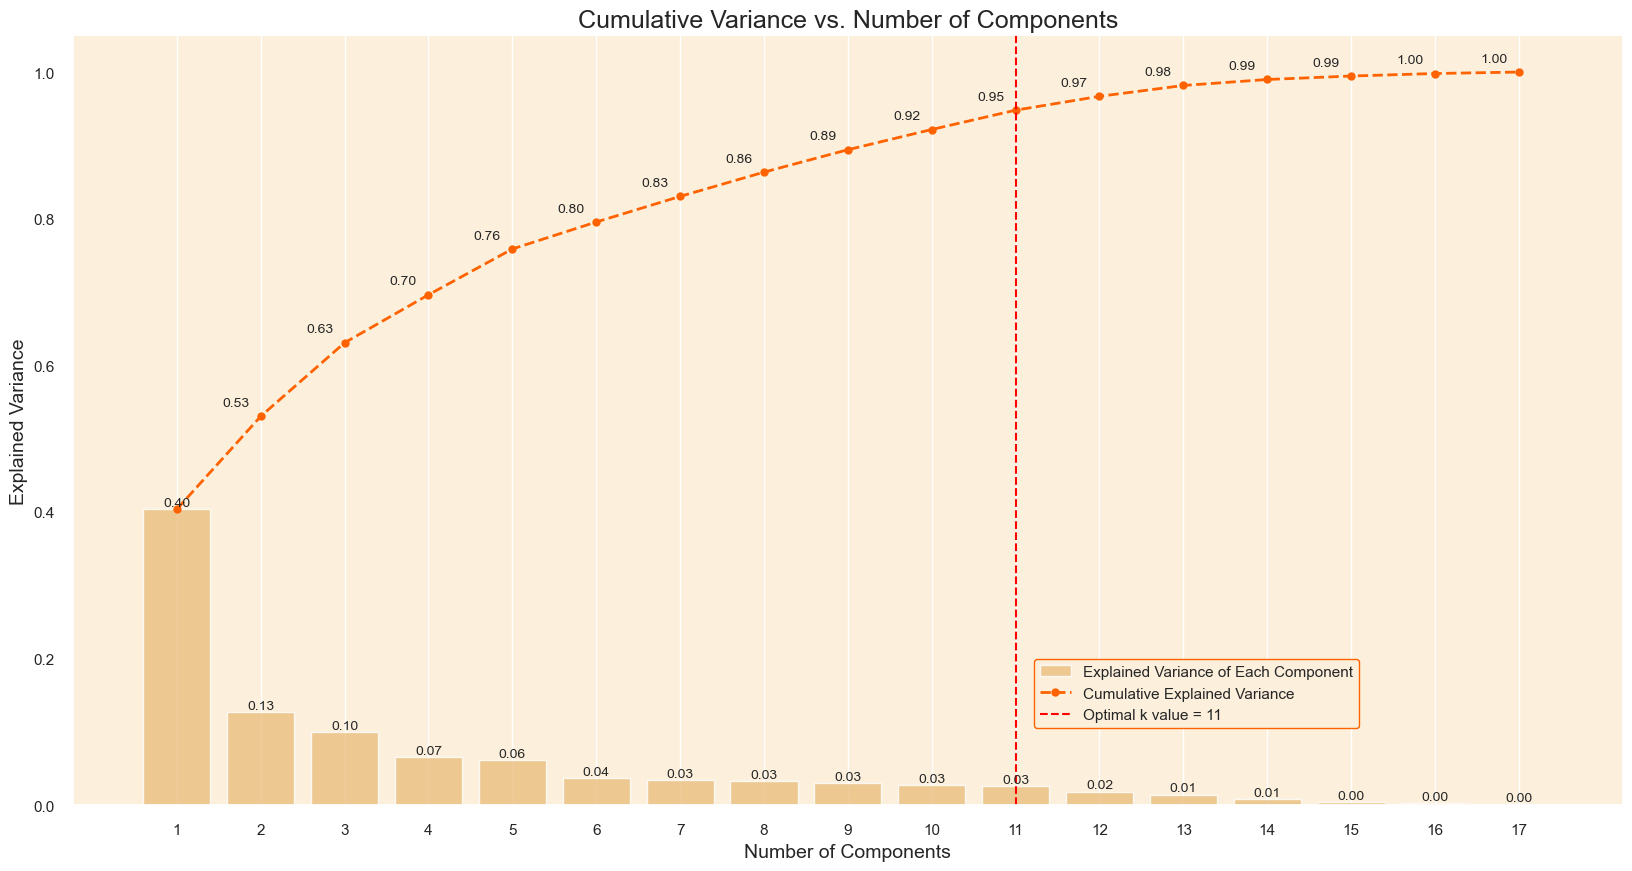

In [176]:
# Setting CustomerID as the index column
# customer_data_scaled.set_index('Customer_ID', inplace=True)

# Apply PCA
pca = PCA().fit(scaled_data)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
min_acceptable_variance = 0.95  

# Find the optimal value of k
optimal_k = np.argmax(cumulative_variance_ratio >= min_acceptable_variance) 

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [177]:
# Creating a PCA object with 5 components
pca = PCA(n_components=11)

# Fitting and transforming the original data to the new PCA dataframe
pca_data = pca.fit_transform(scaled_data)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
pca_data = pd.DataFrame(pca_data, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

In [178]:
# Displaying the resulting dataframe based on the PCs
pca_data.head() 

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.001585 -0.284963 -2.627051  2.061225  2.174115 -0.733216  0.530915   
1 -5.033397 -1.403292  1.022979 -1.040236 -1.127468 -0.831616  0.568294   
2  5.062604  1.353105 -0.915517 -2.028321 -2.012526  3.519848 -0.547107   
3 -4.054216 -0.361486  0.672973 -0.419905  0.772430 -0.767207 -0.724899   
4  5.927460  0.522783 -0.964377  1.418752 -0.305659 -0.867295 -0.273075   

        PC8       PC9      PC10      PC11  
0 -0.002194 -1.301363 -0.254970  1.107696  
1  0.017246 -0.813028 -0.133420  0.956489  
2 -1.073784  1.080166  1.055163  0.458614  
3  0.218386  1.073863  0.087952  1.115644  
4  0.119616 -0.480099  0.481069  0.890187

In [179]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=scaled_data.columns)

pc_df.style.apply(highlight_top3, axis=0)

<a id="kmeans"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 8 | K-Means Clustering</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h2 align="left"><font color=#ff6200>K-Means:</font></h2>

- __K-Means__ is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) by minimizing the __within-cluster sum-of-squares (WCSS)__, also known as __inertia__. The algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points. The process repeats until convergence or a stopping criterion is reached. 

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h2 align="left"><font color=#ff6200>Drawbacks of K-Means:</font></h2>


Here are the main drawbacks of the K-means clustering algorithm and their corresponding solutions:

- 1️⃣ __Inertia is influenced by the number of dimensions__: The value of inertia tends to increase in high-dimensional spaces due to the curse of dimensionality, which can distort the Euclidean distances between data points.

> __Solution:__ Performing dimensionality reduction, such as __PCA__, before applying K-means to alleviate this issue and speed up computations.
    
___ 
    
- 2️⃣ __Dependence on Initial Centroid Placement__: The K-means algorithm might find a local minimum instead of a global minimum, based on where the centroids are initially placed.

> __Solution:__ To enhance the likelihood of locating the global minimum, we can employ the __k-means++ initialization__ method.
  
___ 
    
- 3️⃣ __Requires specifying the number of clusters__: K-means requires specifying the number of clusters (K) beforehand, which may not be known in advance.

> __Solution:__ Using methods such as the __elbow method__ and __silhouette analysis__ to estimate the optimal number of clusters.
    
___     
    
- 4️⃣ __Sensitivity to unevenly sized or sparse clusters__: K-means might struggle with clusters of different sizes or densities.

> __Solution:__ Increasing the number of random initializations (n_init) or consider using algorithms that handle unevenly sized clusters better, like GMM or DBSCAN.
    
___ 
    
- 5️⃣ __Assumes convex and isotropic clusters__: K-means assumes that clusters are spherical and have similar variances, which is not always the case. It may struggle with elongated or irregularly shaped clusters.
    
> __Solution:__ Considering using clustering algorithms that do not make these assumptions, such as DBSCAN or Gaussian Mixture Model (GMM).
    
___
    
Taking into account the aforementioned considerations, I initially applied PCA to the dataset. For the KMeans algorithm, I will set the `init` parameter to `k-means++` and `n_init` to `10`. To determine the optimal number of clusters, I will employ the elbow method and silhouette analysis. Additionally, it might be beneficial to explore the use of alternative clustering algorithms such as GMM and DBSCAN in future analyses to potentially enhance the segmentation results.

<a id="optimal_k"></a>
# <b><span style='color:#fcc36d'>Step 8.1 |</span><span style='color:#ff6200'> Determining the Optimal Number of Clusters</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

To ascertain the optimal number of clusters (k) for segmenting customers, I will explore two renowned methods:

* __Elbow Method__

* __Calinski-Harabasz Index__

    
It's common to utilize both methods in practice to corroborate the results.

<a id="elbow"></a>
## <b><span style='color:#fcc36d'>Step 8.1.1 |</span><span style='color:#ff6200'> Elbow Method</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>What is the Elbow Method?</font></h3>
    
The Elbow Method is a technique for identifying the ideal number of clusters in a dataset. It involves iterating through the data, generating clusters for various values of k. The k-means algorithm calculates the sum of squared distances between each data point and its assigned cluster centroid, known as the __inertia__ or __WCSS__ score. By plotting the inertia score against the k value, we create a graph that typically exhibits an elbow shape, hence the name "__Elbow Method__". The __elbow point__ represents the k-value where the reduction in inertia achieved by increasing k becomes negligible, indicating the optimal stopping point for the number of clusters.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Utilizing the YellowBrick Library</font></h3>

In this section, I will employ the __YellowBrick__ library to facilitate the implementation of the __Elbow method__. YellowBrick, an extension of the Scikit-Learn API, is renowned for its ability to rapidly generate insightful visualizations in the field of machine learning.

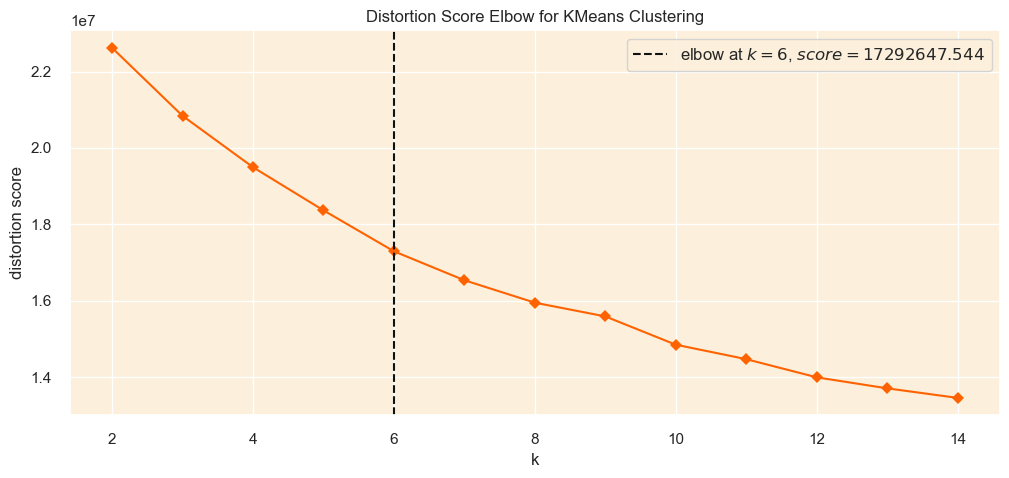

In [168]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(scaled_data)

# Finalize and render the figure
visualizer.show();

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Optimal k Value: Elbow Method Insights</font></h3>

The optimal value of k for the KMeans clustering algorithm can be found at the __elbow point__. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is __6__. However, __we don't have a very distinct elbow point in this case__, which is common in real-world data. From the plot, we can see that the inertia continues to decrease significantly up to k=6, indicating that __the optimum value of k could be between 7 and 10__. To choose the best k within this range, we can employ the __silhouette analysis__, another cluster quality evaluation method. Additionally, incorporating business insights can help determine a practical k value.

<a id="Calinski-Harabasz_Index"></a>
## <b><span style='color:#fcc36d'>Step 8.1.2 |</span><span style='color:#ff6200'> Calinski-Harabasz Index</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>What is the Calinski-Harabasz Index?</font></h3>
    
A clustering validation metric called the __Calinski-Harabasz Index__ is used to evaluate the quality of clusters within a dataset. Higher values indicate compact and well-separated clusters. It computes the __ratio__ of the __within-cluster variance__ to the __between-cluster variance__. It helps determine the ideal number of clusters for a given dataset by comparing the index across various clusterings. Improved cluster definition is implied by a higher Calinski-Harabasz Index. This measure is useful for assessing how well clustering algorithms work, which helps choose the best clustering solution for a variety of datasets.

____
    
<h3 align="left"><font color=#ff6200>Calinski-Harabasz Index (CH) is calculated as:</font></h3>
    

$$ CH = \frac{B}{W} * \frac{N-K}{K-1} $$
Here.
    
* __B__: is the sum of squares between clusters.
* __W__: is the sum of squares within clusters.
* __N__: is the total number of data points.
* __K__: is the number of clusters.    

____
    
  
<h3 align="left"><font color=#ff6200>Interpretation:</font></h3>


The Calinski-Harabasz Index (CH) provides a quantitative measure to assess the quality of clusters within a dataset. A higher CH value indicates that the clusters are more compact and well-separated from each other.

Interpretation:

    
* __Higher CH__ values imply that the clusters are more __distinct__ and well-defined, indicating a better clustering solution.


* __Lower CH__ values suggest that the clusters are less compact and __may overlap__, indicating poorer cluster quality.

    
* __Comparing CH__ values across different clusterings can help in selecting the __optimal number of clusters__ for a given dataset.
    
The CH index is useful for evaluating the effectiveness of clustering algorithms and choosing the best clustering solution for various datasets.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Methodology</font></h3>
    
In the following analysis:

- I will initially choose a range of 6-12 for the number of clusters (k) based on the Elbow method from the previous section. Next, I will plot __calinski_harabasz_score__ for each k value to determine the one with the highest score.


- Subsequently, to fine-tune the selection of the most appropriate k, I will generate __Calinski-Harabasz plots__ that visually display the __Calinski-Harabasz Score for each k__.


The __YellowBrick__ library will be utilized once again to create these plots and facilitate a comparative analysis.

In [187]:
k_values = range(6, 13)

# Store the Calinski-Harabasz scores for each k
ch_scores = []

# Iterate over each value of k
for k in k_values:
    # Instantiate the KMeans model
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
    
    # Fit the model to the data
    kmeans.fit(df_2024)  # Assuming pca_data is your dataset
    
    # Calculate the Calinski-Harabasz score
    ch_score = metrics.calinski_harabasz_score(df_2024, kmeans.labels_)
    
    # Append the score to the list
    ch_scores.append(ch_score)

# Find the optimal value of k with the maximum Calinski-Harabasz score
optimal_k = k_values[ch_scores.index(max(ch_scores))]

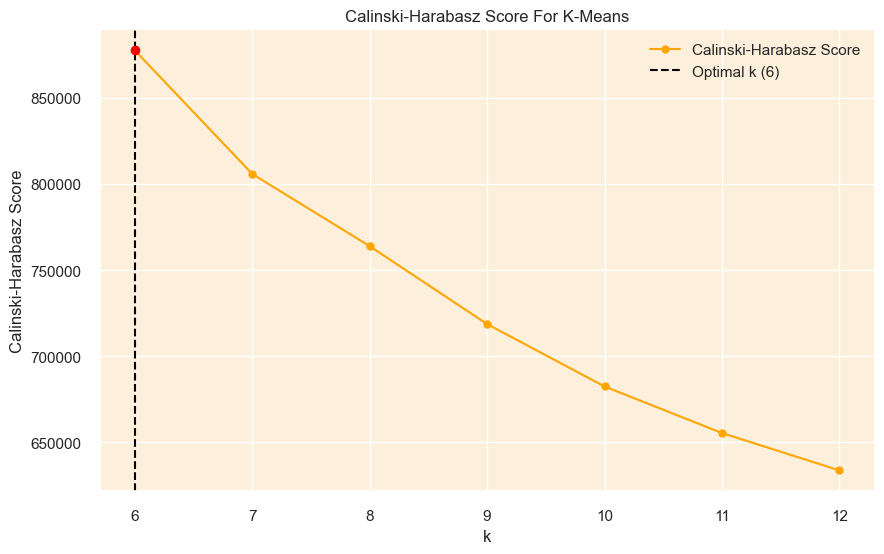

In [188]:
# Plot the Calinski-Harabasz scores against the number of clusters (k)
plt.figure(figsize=(10, 6))
plt.plot(k_values, ch_scores, marker='o', color='orange', label='Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score For K-Means')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)

# Add vertical line at optimal k
plt.axvline(x=optimal_k, color='black', linestyle='--', label=f'Optimal k ({optimal_k})')

# Highlight optimal k point
plt.scatter(optimal_k, max(ch_scores), color='red', zorder=5)
plt.legend()
plt.show()

<a id="kmeans_model"></a>
# <b><span style='color:#fcc36d'>Step 8.2 |</span><span style='color:#ff6200'> Clustering Model - K-means</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, I am going to apply the K-means clustering algorithm to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the optimal number of clusters determined in the previous step.

It's important to note that the K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to swap the labels based on the frequency of samples in each cluster, ensuring a consistent label assignment across different runs.

In [253]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(pca_data)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
df_2024['cluster'] = new_labels
pca_data['cluster'] = new_labels

In [254]:
# Display the first few rows of the original dataframe
df_2024.head()

Days_Since_Last_Purchase  Total_Trips  Total_Spend  \
0                        11            1       116.61   
1                       103            2       557.01   
2                       789            2       250.00   
3                        94            2       608.00   
4                       153            2       253.00   

   Average_Transaction_Value  Average_Days_Between_Purchases  Day_Of_Week  \
0                    116.610                             0.0            2   
1                    278.505                             0.0            4   
2                    125.000                             0.0            1   
3                    304.000                             0.0            3   
4                    126.500                             0.0            2   

   Month_Of_Year  distance_leg  RBD  number_in_party  pnr_average_age  \
0              4         353.0   19              2.0         3.500000   
1              1        2210.0   15              1.0        63.000000   
2             11        2546.0    5              1.0        68.000000   
3              2        1579.0    1              3.0        33.333333   
4             12         172.0   12              1.0        40.000000   

   average_advanced_booking  Yearly_Spending_Mean  Yearly_Spending_Std  \
0                         1                116.61                  0.0   
1                         4                557.01                  0.0   
2                       246                250.00                  0.0   
3                        22                608.00                  0.0   
4                        17                253.00                  0.0   

   Spending_Trend  GENDER  AGE  cluster  
0             0.0       0    3        0  
1             0.0       0   63        4  
2             0.0       1   68        2  
3             0.0       1   47        4  
4             0.0       0   40        2

<a id="evaluation"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 9 | Clustering Evaluation</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="3d_visualization"></a>
# <b><span style='color:#fcc36d'>Step 9.1 |</span><span style='color:#ff6200'> 3D Visualization of Top Principal Components</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [255]:
colors = ['#e8000b', '#1ac938', '#023eff', '#ff7c00', '#8700ff', '#16ff32', '#ff00bf']

In [ ]:
clusters = []
for i in range(7):
    cluster = pca_data[pca_data['cluster'] == i]
    clusters.append(cluster)

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
for i, cluster_df in enumerate(clusters):
    fig.add_trace(go.Scatter3d(x=cluster_df['PC1'], y=cluster_df['PC2'], z=cluster_df['PC3'], 
                               mode='markers', marker=dict(color=colors[i], size=5, opacity=0.4), name=f'Cluster {i}'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

<a id="cluster_distribution"></a>
# <b><span style='color:#fcc36d'>Step 9.2 |</span><span style='color:#ff6200'> Cluster Distribution Visualization</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

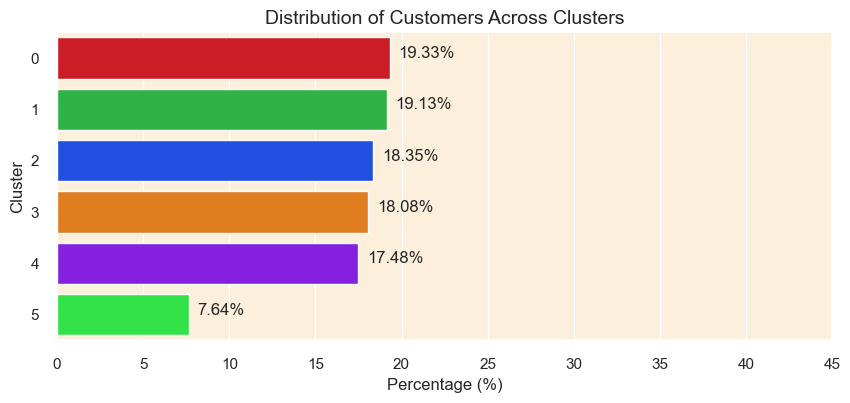

In [256]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (df_2024['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

<a id="evaluations_metrics"></a>
# <b><span style='color:#fcc36d'>Step 9.3 |</span><span style='color:#ff6200'> Evaluation Metrices</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [257]:
# Compute Davies-Bouldin Index
dbi = davies_bouldin_score(df_2024, kmeans.labels_)
print("Davies-Bouldin Index for K-Means:", dbi)

# Evaluate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(df_2024, kmeans.labels_)
print("Calinski-Harabasz Index for K-Means:", calinski_harabasz)

Davies-Bouldin Index for K-Means: 20.309207896568854
Calinski-Harabasz Index for K-Means: 12540.557121218673


<a id="cluster"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 10 | Cluster Analysis</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="radar_chart"></a>
# <b><span style='color:#fcc36d'>Step 10.1 |</span><span style='color:#ff6200'> Radar Chart Approach</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

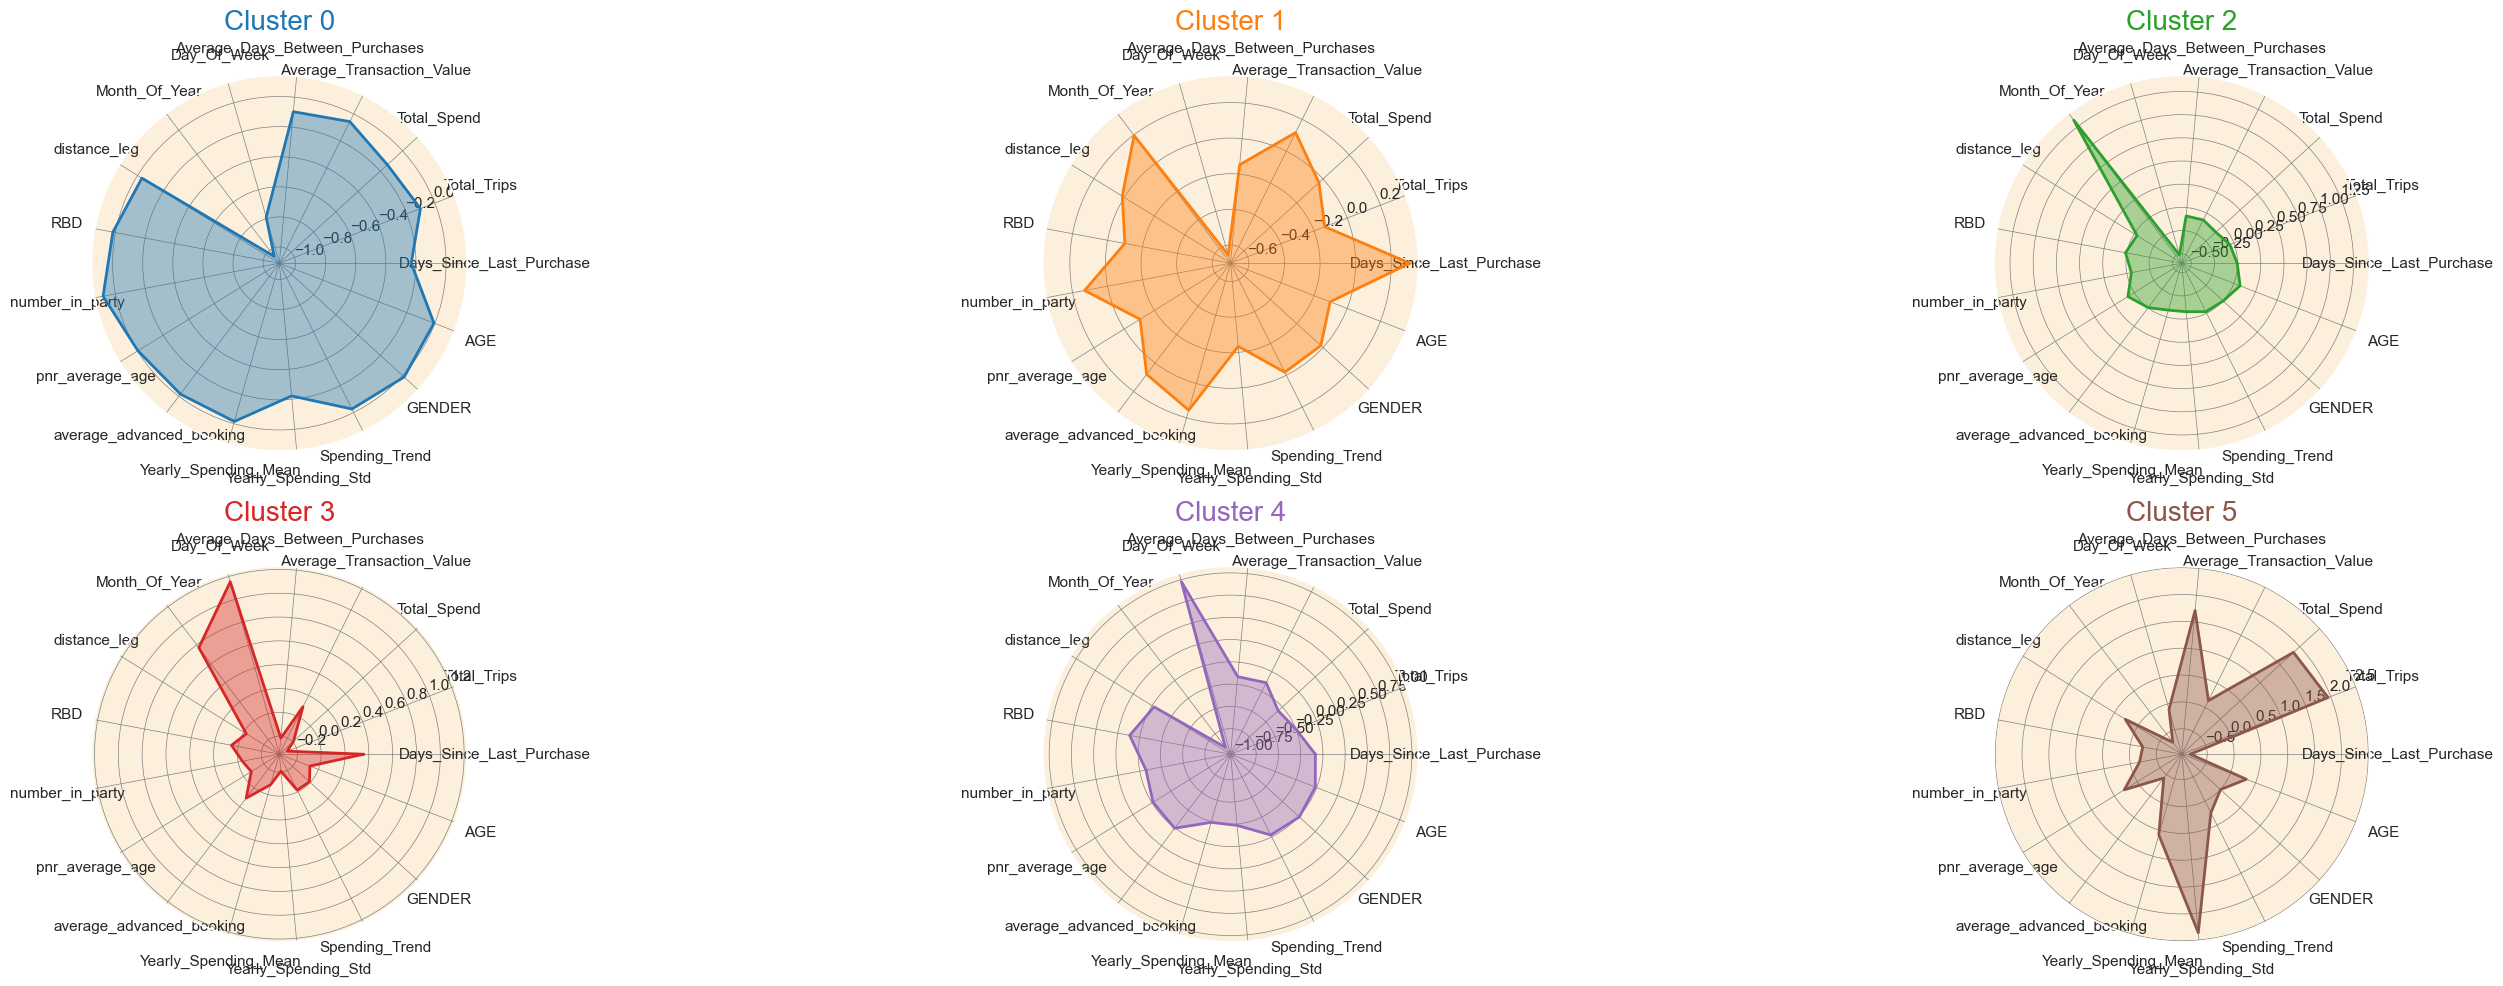

In [200]:
# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_2024.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_2024.columns[:-1], index=df_2024.index)
df_customer_standardized['cluster'] = df_2024['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(30, 10), subplot_kw=dict(polar=True), nrows=2, ncols=3)

# Colors for each cluster
colors = plt.cm.tab10.colors[:6]

# Create radar chart for each cluster
for i, color in enumerate(colors):
    row = i // 3
    col = i % 3
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[row, col], angles, data, color, i)

# Add input data
for a in ax.flat:
    a.set_xticks(angles[:-1])
    a.set_xticklabels(labels[:-1])
    a.grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


In [201]:
# Assuming 'cluster' column is already set as the index
for cluster_id in df_customer_standardized['cluster'].unique():
    cluster_data = df_customer_standardized[df_customer_standardized['cluster'] == cluster_id].drop(columns=['cluster'], axis=1)
    description = cluster_data.describe()
    print(f"Cluster {cluster_id} Description:")
    print(description)

Cluster 0 Description:
       Days_Since_Last_Purchase    Total_Trips    Total_Spend  \
count             211221.000000  211221.000000  211221.000000   
mean                  -0.231268      -0.102359      -0.136361   
std                    0.994735       0.598175       0.741113   
min                   -1.624705      -0.742123      -1.261304   
25%                   -1.219719      -0.742123      -0.669577   
50%                   -0.123656      -0.068668      -0.285922   
75%                    0.340778      -0.068668       0.234696   
max                    4.085969       6.665882       4.040136   

       Average_Transaction_Value  Average_Days_Between_Purchases  \
count              211221.000000                   211221.000000   
mean                   -0.056777                       -0.096692   
std                     1.016050                        0.768988   
min                    -1.662111                       -0.393264   
25%                    -0.755111                   

Cluster 1 Description:
       Days_Since_Last_Purchase    Total_Trips    Total_Spend  \
count             208995.000000  208995.000000  208995.000000   
mean                   0.304522      -0.134987      -0.030691   
std                    0.856610       0.583967       0.816035   
min                   -1.620989      -0.742123      -1.261304   
25%                   -0.398600      -0.742123      -0.616744   
50%                   -0.053062      -0.068668      -0.198013   
75%                    0.972407      -0.068668       0.382453   
max                    8.273302       8.012792       5.831003   

       Average_Transaction_Value  Average_Days_Between_Purchases  \
count              208995.000000                   208995.000000   
mean                    0.117367                       -0.147440   
std                     1.073769                        0.731065   
min                    -1.662111                       -0.393264   
25%                    -0.636216                   

<a id="histogram"></a>
# <b><span style='color:#fcc36d'>Step 10.2 |</span><span style='color:#ff6200'> Histogram Chart Approach</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

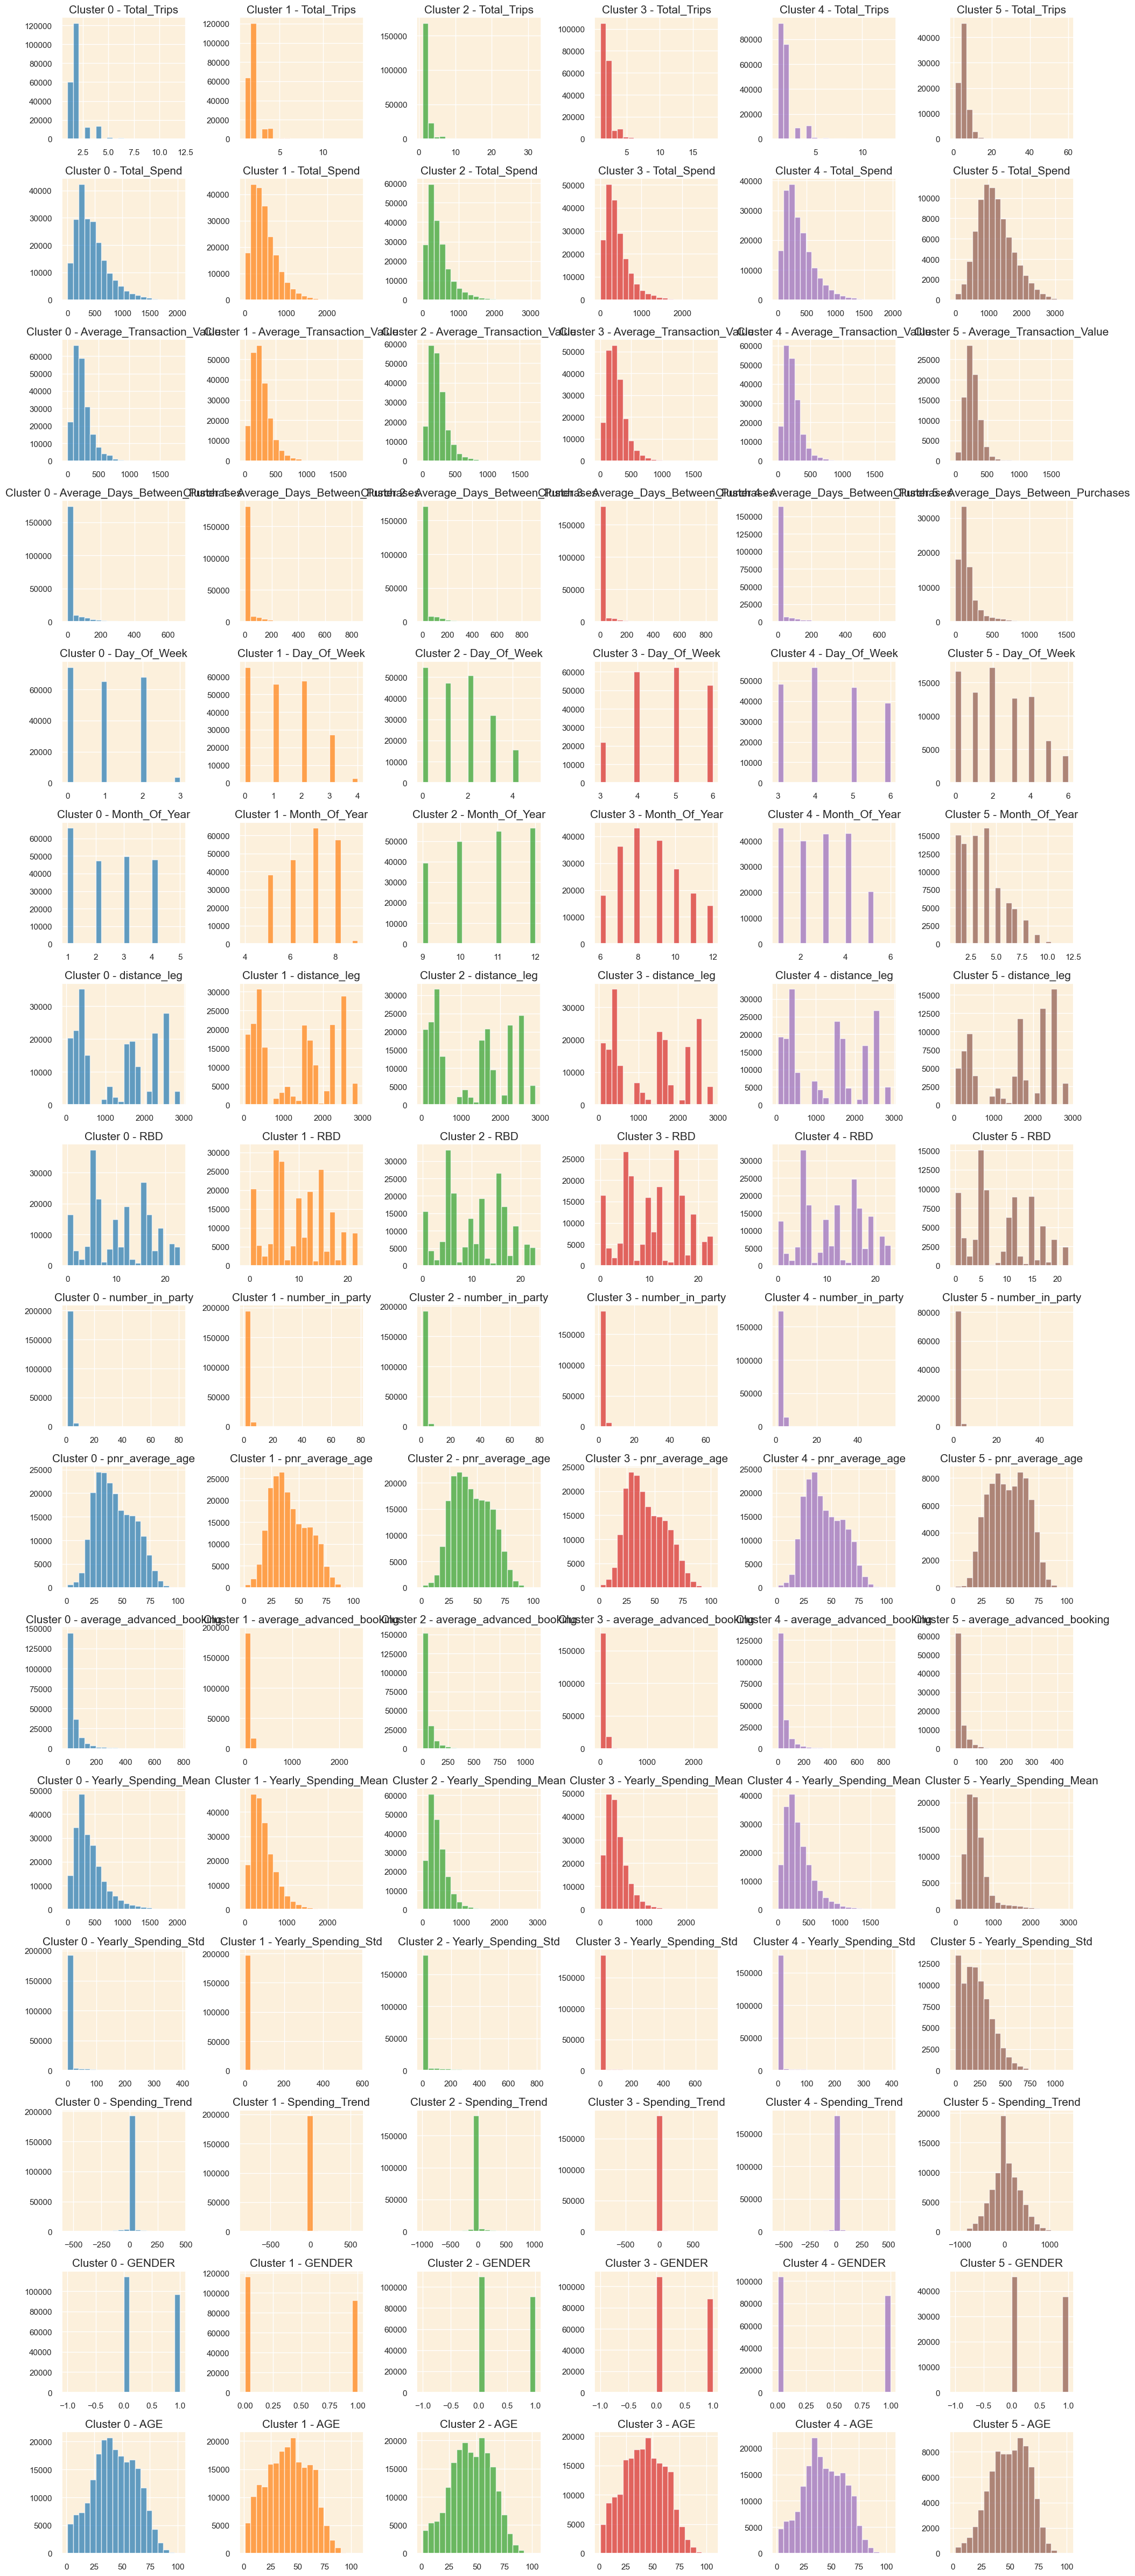

In [202]:
# Plot histograms for each feature segmented by the clusters
features = df_2024.columns[1:-1]
clusters = df_2024['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = df_2024[df_2024['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

<a id="gaussian_mixture"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 11 | Gaussian-Mixture Clustering</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h2 align="left"><font color=#ff6200>Gaussian Mixture Model (GMM):</font></h2>

- __Gaussian Mixture Model (GMM)__ is a probabilistic model that represents a dataset as a mixture of multiple Gaussian distributions. Unlike K-Means, which assumes spherical clusters, GMM allows for more flexible cluster shapes by modeling clusters as ellipsoids with varying sizes and orientations.

- In GMM, each data point is associated with a probability distribution over the clusters, indicating the likelihood of the point belonging to each cluster. The model parameters, including the means, covariances, and mixing coefficients of the Gaussian components, are estimated using the Expectation-Maximization (EM) algorithm.

- GMM is useful for clustering datasets where the underlying clusters may have different shapes or sizes and when the uncertainty of cluster assignments is desired.
</div>

<a id="k"></a>
# <b><span style='color:#fcc36d'>Step 11.1 |</span><span style='color:#ff6200'> Determining the Optimal Number of Clusters</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">


To determine the optimal number of clusters (k) for segmenting customers using GMM we use below method:
    
* __Bayesian Information Criterion (BIC)__
* __Akaike Information Criterion (AIC)__

</div>

<a id="bic"></a>
## <b><span style='color:#fcc36d'>Step 11.1.1 |</span><span style='color:#ff6200'> Bayesian Information Criterion (BIC)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
* __Bayesian Information Criterion (BIC)__

    BIC is a criterion for model selection among a finite set of models, where the model with the lowest BIC value is preferred. 

    In the context of GMM, BIC balances the trade-off between model fit and complexity, penalizing models with more parameters. It is calculated as the negative log-likelihood of the data under the model, adjusted for the number of parameters and the sample size.

    By evaluating the BIC values for different values of k and selecting the model with the lowest BIC, we can determine the optimal number of clusters for our customer segmentation task.

</div>


In [278]:
k_values = range(2, 12)

# Initialize an empty list to store the BIC scores
bic_scores = []

# Iterate through each value of k
for k in k_values:
    # Create and fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(df_2024)
    
    # Calculate the BIC score and append it to the list
    bic_scores.append(gmm.bic(df_2024))


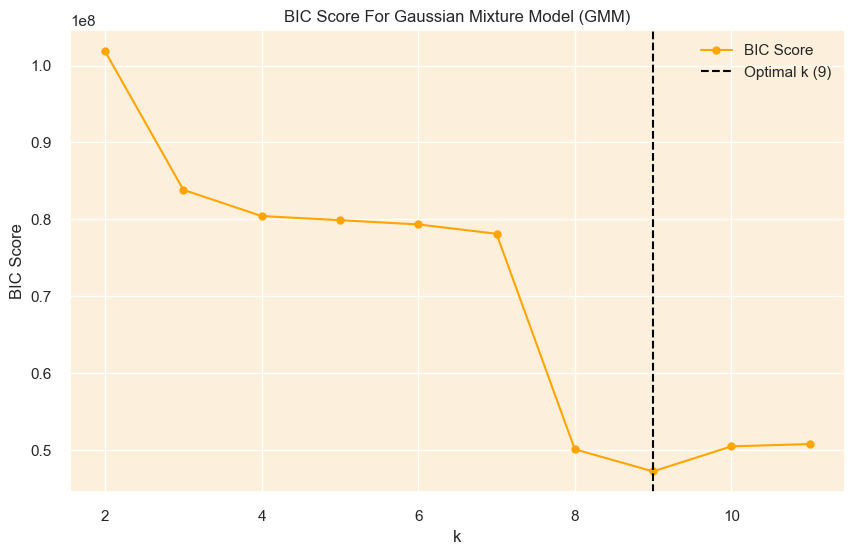

In [279]:
min_index = bic_scores.index(min(bic_scores))

# Get the corresponding value of k from k_values using the min_index
optimal_k = k_values[min_index]   # Add 2 because range starts from 2

# Plot the BIC scores against the number of clusters (k)
plt.figure(figsize=(10, 6))
plt.plot(k_values, bic_scores, marker='o', color='orange', label='BIC Score')
plt.axvline(x=optimal_k, color='black', linestyle='--', label=f'Optimal k ({optimal_k})')
plt.title('BIC Score For Gaussian Mixture Model (GMM)')
plt.xlabel('k')
plt.ylabel('BIC Score')
plt.grid(True)
plt.legend()
plt.show()

<a id="aic"></a>
## <b><span style='color:#fcc36d'>Step 11.1.2 |</span><span style='color:#ff6200'> Akaike Information Criterion (AIC)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
* __Akaike Information Criterion (AIC)__

    AIC, similar to BIC, is a criterion for model selection among a set of candidate models. In the context of GMM, AIC also balances the trade-off between model fit and complexity but uses a different penalty term based on the number of parameters.

    AIC is calculated as the negative log-likelihood of the data under the model, adjusted for the number of parameters. Like BIC, lower AIC values indicate a better trade-off between fit and complexity.

    By evaluating the AIC values for different values of k and selecting the model with the lowest AIC, we can determine the optimal number of clusters for our customer segmentation task.

</div>


In [ ]:
k_values = range(2, 12)

aic_scores = []

# Iterate through each value of k
for k in k_values:
    # Create and fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(df_2024)
    
    # Calculate the AIC score and append it to the list
    aic_scores.append(gmm.aic(df_2024))

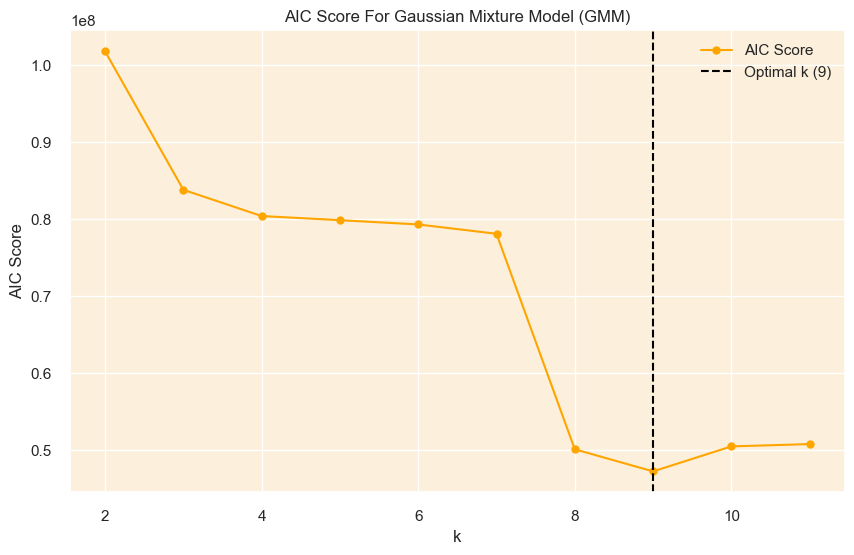

In [280]:
min_index = aic_scores.index(min(aic_scores))

# Get the corresponding value of k from k_values using the min_index
optimal_k = k_values[min_index]   # Add 2 because range starts from 2

# Plot the BIC scores against the number of clusters (k)
plt.figure(figsize=(10, 6))
plt.plot(k_values, aic_scores, marker='o', color='orange', label='AIC Score')
plt.axvline(x=optimal_k, color='black', linestyle='--', label=f'Optimal k ({optimal_k})')
plt.title('AIC Score For Gaussian Mixture Model (GMM)')
plt.xlabel('k')
plt.ylabel('AIC Score')
plt.grid(True)
plt.legend()
plt.show()

<a id="gaussian_mixture_model"></a>
# <b><span style='color:#fcc36d'>Step 11.2 |</span><span style='color:#ff6200'> Clustering Model - Gaussian_Mixture</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [289]:
# Apply Gaussian Mixture Model clustering using the optimal number of clusters
gmm = GaussianMixture(n_components=9, init_params='kmeans', n_init=10, max_iter=100, random_state=0)
gmm.fit(df_2024)

# Get the predicted cluster labels
gmm_labels = gmm.predict(df_2024)

# Get the frequency of each cluster
cluster_frequencies = Counter(gmm_labels)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in gmm_labels])

# Append the new cluster labels back to the original dataset
df_2024['cluster'] = new_labels

In [292]:
df_2024.head()

Days_Since_Last_Purchase  Total_Trips  Total_Spend  \
0                        11            1       116.61   
1                       103            2       557.01   
2                       789            2       250.00   
3                        94            2       608.00   
4                       153            2       253.00   

   Average_Transaction_Value  Average_Days_Between_Purchases  Day_Of_Week  \
0                    116.610                             0.0            2   
1                    278.505                             0.0            4   
2                    125.000                             0.0            1   
3                    304.000                             0.0            3   
4                    126.500                             0.0            2   

   Month_Of_Year  distance_leg  RBD  number_in_party  pnr_average_age  \
0              4         353.0   19              2.0         3.500000   
1              1        2210.0   15              1.0        63.000000   
2             11        2546.0    5              1.0        68.000000   
3              2        1579.0    1              3.0        33.333333   
4             12         172.0   12              1.0        40.000000   

   average_advanced_booking  Yearly_Spending_Mean  Yearly_Spending_Std  \
0                         1                116.61                  0.0   
1                         4                557.01                  0.0   
2                       246                250.00                  0.0   
3                        22                608.00                  0.0   
4                        17                253.00                  0.0   

   Spending_Trend  GENDER  AGE  cluster  
0             0.0       0    3        0  
1             0.0       0   63        0  
2             0.0       1   68        0  
3             0.0       1   47        0  
4             0.0       0   40        0

<a id="gaussian_evaluation"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 12 | Gaussian Clustering Evaluation</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="gaussian_cluster_distribution"></a>
# <b><span style='color:#fcc36d'>Step 12.1 |</span><span style='color:#ff6200'> Gaussian Clusters Distribution Visualization</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [293]:
colors = ['#e8000b', '#1ac938', '#023eff', '#ff7c00', '#8700ff', '#16ff32', '#ff00bf']

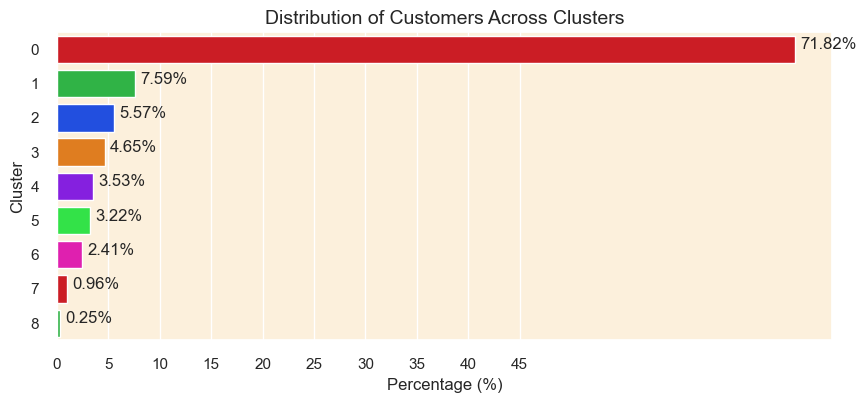

In [294]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (df_2024['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

<a id="gaussian_evaluations_metrics"></a>
# <b><span style='color:#fcc36d'>Step 12.2 |</span><span style='color:#ff6200'> Gaussian Evaluation Metrics</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [295]:
#AIC (Akaike Information Criterion)  as an alternative for model selection
aic_score = gmm.aic(df_2024)
print("AIC Score for Gaussian Mixture Model:", aic_score)

# Calinski-Harabasz Index is not directly available for GMM in scikit-learn
# But you can use BIC (Bayesian Information Criterion) as an alternative for model selection
bic_score = gmm.bic(df_2024)
print("BIC Score for Gaussian Mixture Model:", bic_score)

AIC Score for Gaussian Mixture Model: 25790923420.62158
BIC Score for Gaussian Mixture Model: 25790943764.894306


<a id="gaussian_cluster"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 13 | Gaussian Cluster Analysis</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="gaussian_radar_chart"></a>
# <b><span style='color:#fcc36d'>Step 13.1 |</span><span style='color:#ff6200'> Gaussian Radar Chart Approach</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

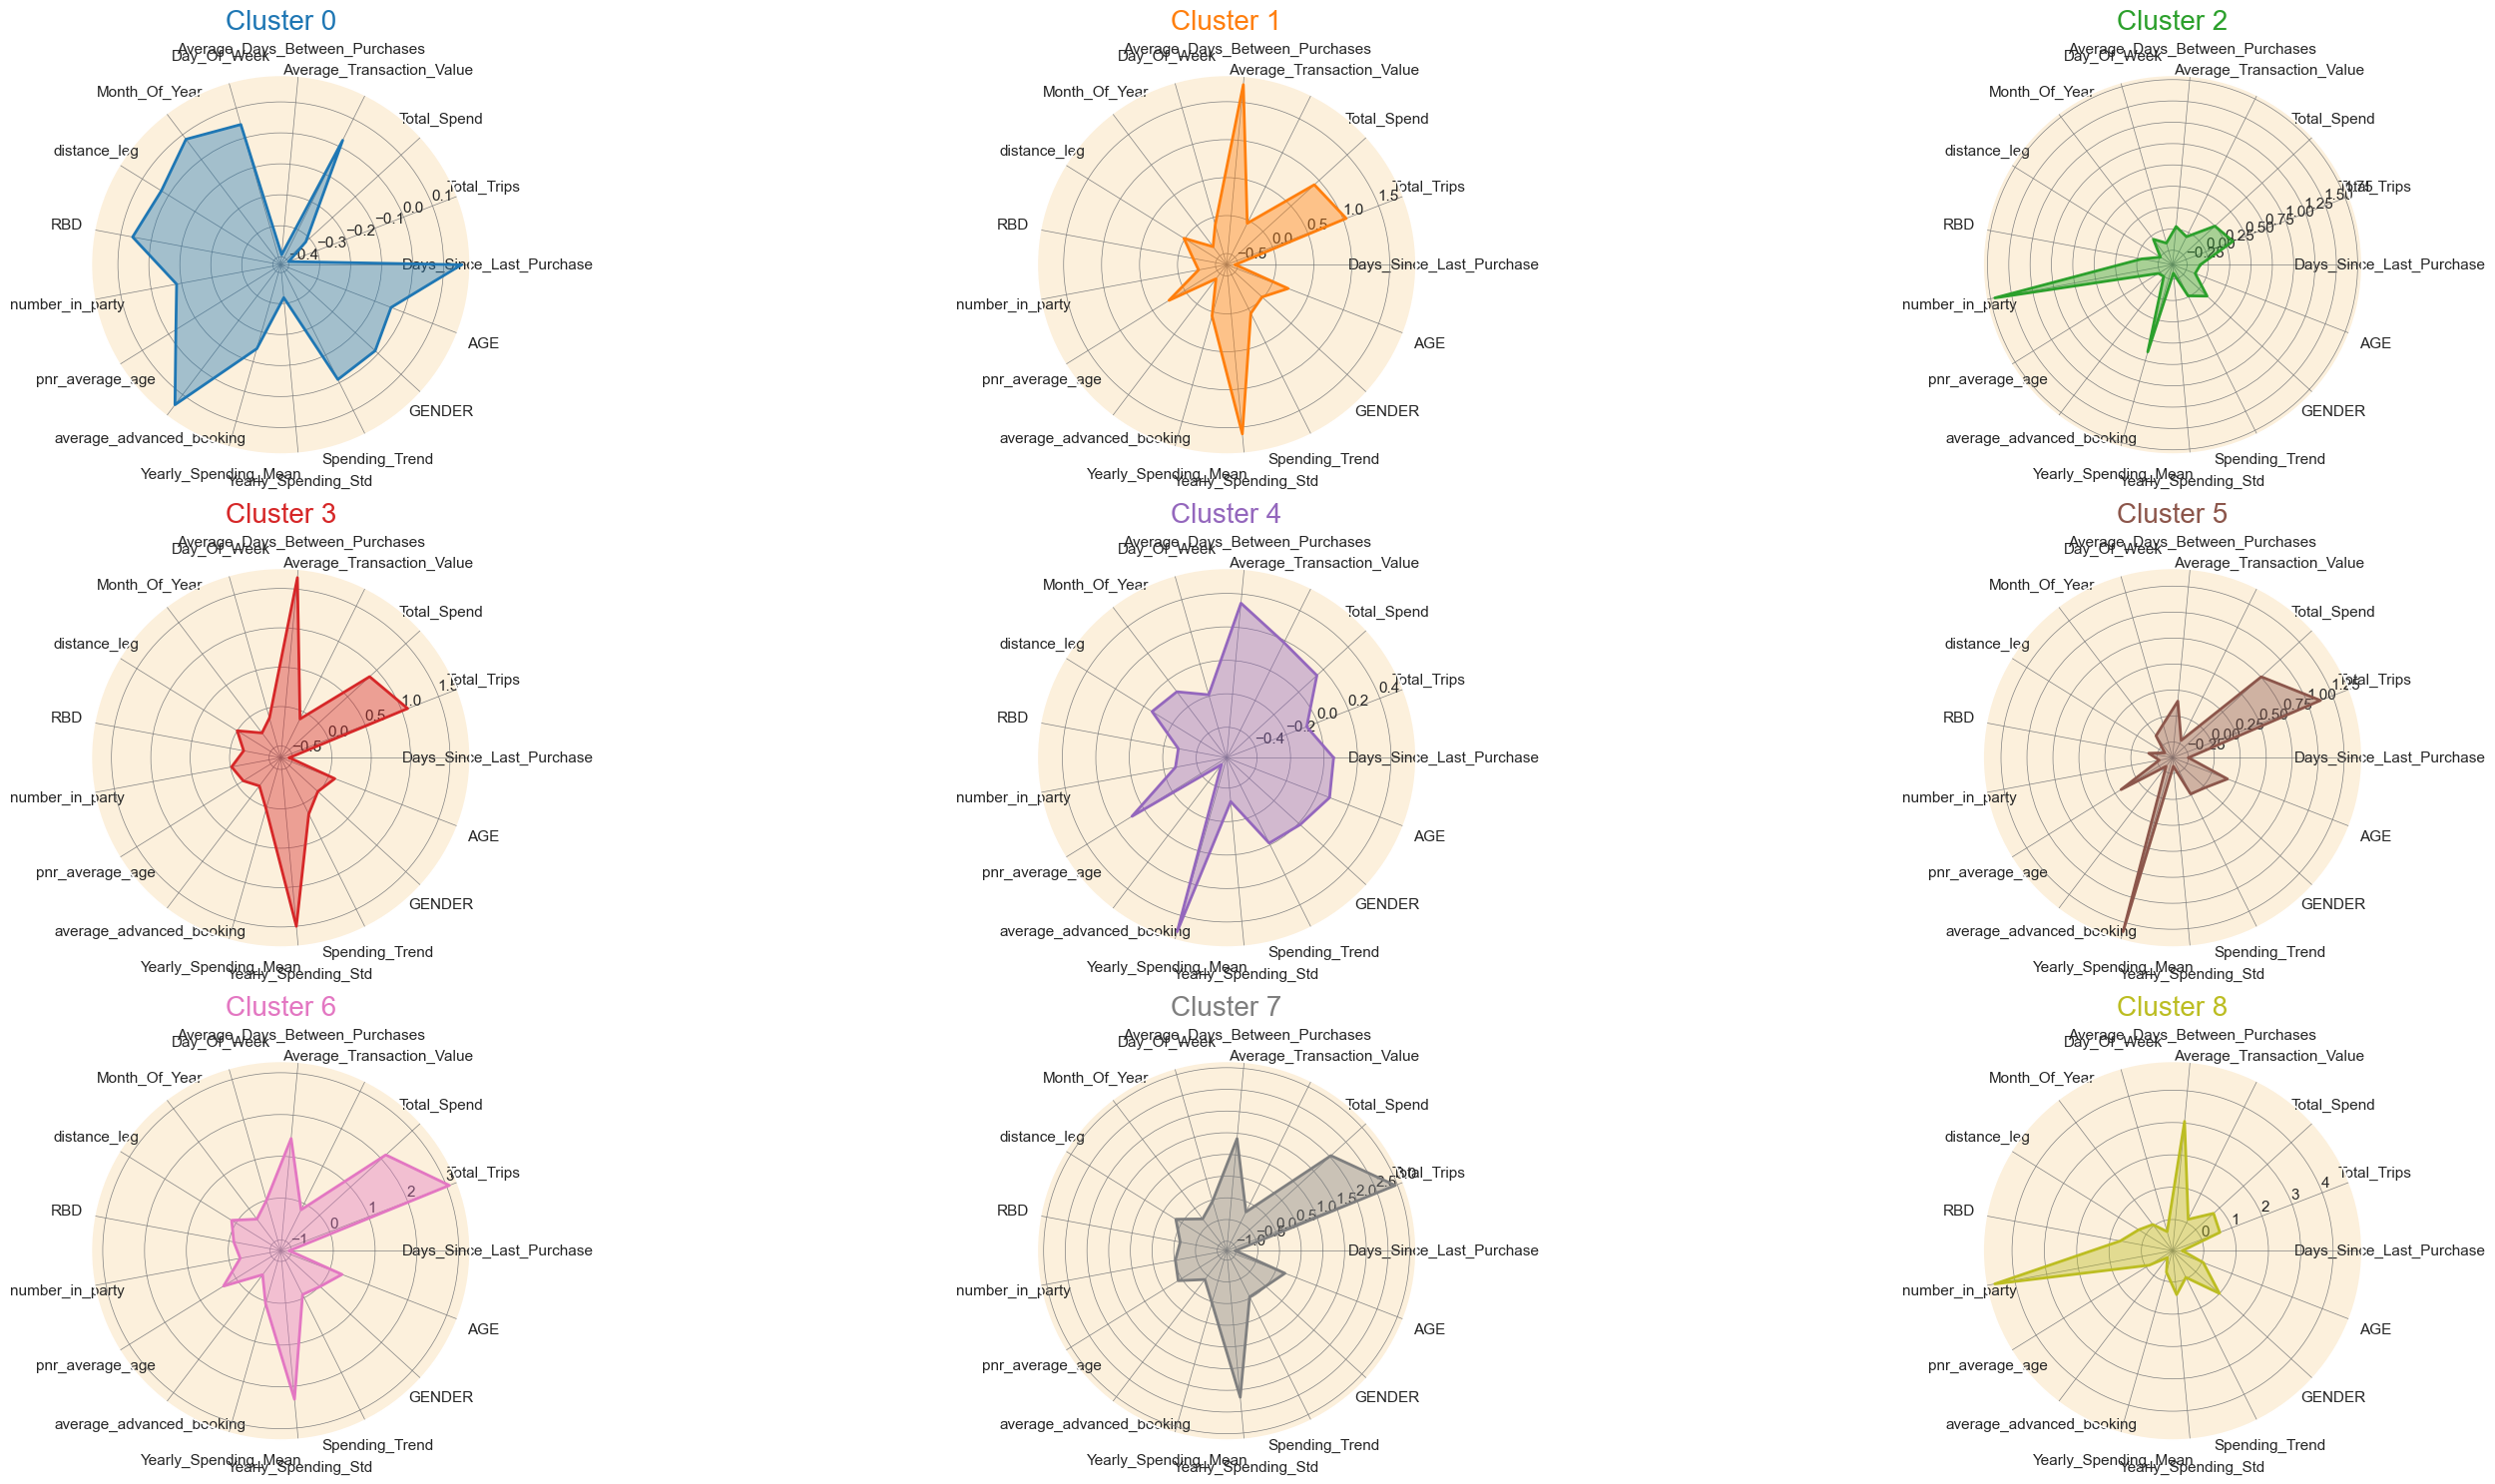

In [297]:

# Calculate the centroids of each cluster for 9 clusters
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(30, 15), subplot_kw=dict(polar=True), nrows=3, ncols=3)

# Colors for each cluster
colors = plt.cm.tab10.colors[:9]

# Create radar chart for each cluster
for i, color in enumerate(colors):
    row = i // 3
    col = i % 3
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[row, col], angles, data, color, i)

# Add input data
for a in ax.flat:
    a.set_xticks(angles[:-1])
    a.set_xticklabels(labels[:-1])
    a.grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


In [298]:
# Assuming 'cluster' column is already set as the index
for cluster_id in df_customer_standardized['cluster'].unique():
    cluster_data = df_customer_standardized[df_customer_standardized['cluster'] == cluster_id].drop(columns=['cluster'], axis=1)
    description = cluster_data.describe()
    print(f"Cluster {cluster_id} Description:")
    print(description)

Cluster 0 Description:
       Days_Since_Last_Purchase    Total_Trips    Total_Spend  \
count             784780.000000  784780.000000  784780.000000   
mean                   0.158208      -0.397870      -0.316137   
std                    1.001804       0.336644       0.640835   
min                   -1.620989      -0.742123      -1.261304   
25%                   -0.654967      -0.742123      -0.761705   
50%                    0.028679      -0.068668      -0.469194   
75%                    0.957546      -0.068668      -0.018779   
max                    8.273302      -0.068668       5.101718   

       Average_Transaction_Value  Average_Days_Between_Purchases  \
count              784780.000000                    7.847800e+05   
mean                    0.023208                   -3.932636e-01   
std                     1.066815                    2.835567e-12   
min                    -1.662111                   -3.932636e-01   
25%                    -0.731332                   

Cluster 2 Description:
       Days_Since_Last_Purchase   Total_Trips   Total_Spend  \
count              60824.000000  60824.000000  60824.000000   
mean                  -0.093733      0.340107      0.251826   
std                    0.920176      0.781678      0.996969   
min                   -1.620989     -0.742123     -1.261304   
25%                   -0.837025     -0.068668     -0.511026   
50%                   -0.279705     -0.068668      0.038170   
75%                    0.634300      0.604787      0.781096   
max                    2.815279      6.665882      6.468237   

       Average_Transaction_Value  Average_Days_Between_Purchases  \
count               60824.000000                    60824.000000   
mean                   -0.053741                        0.029762   
std                     0.863064                        0.616726   
min                    -1.662111                       -0.393264   
25%                    -0.652963                       -0.393264   
5

<a id="gaussian_histogram"></a>
# <b><span style='color:#fcc36d'>Step 13.2 |</span><span style='color:#ff6200'> Gaussian Histogram Chart Approach</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

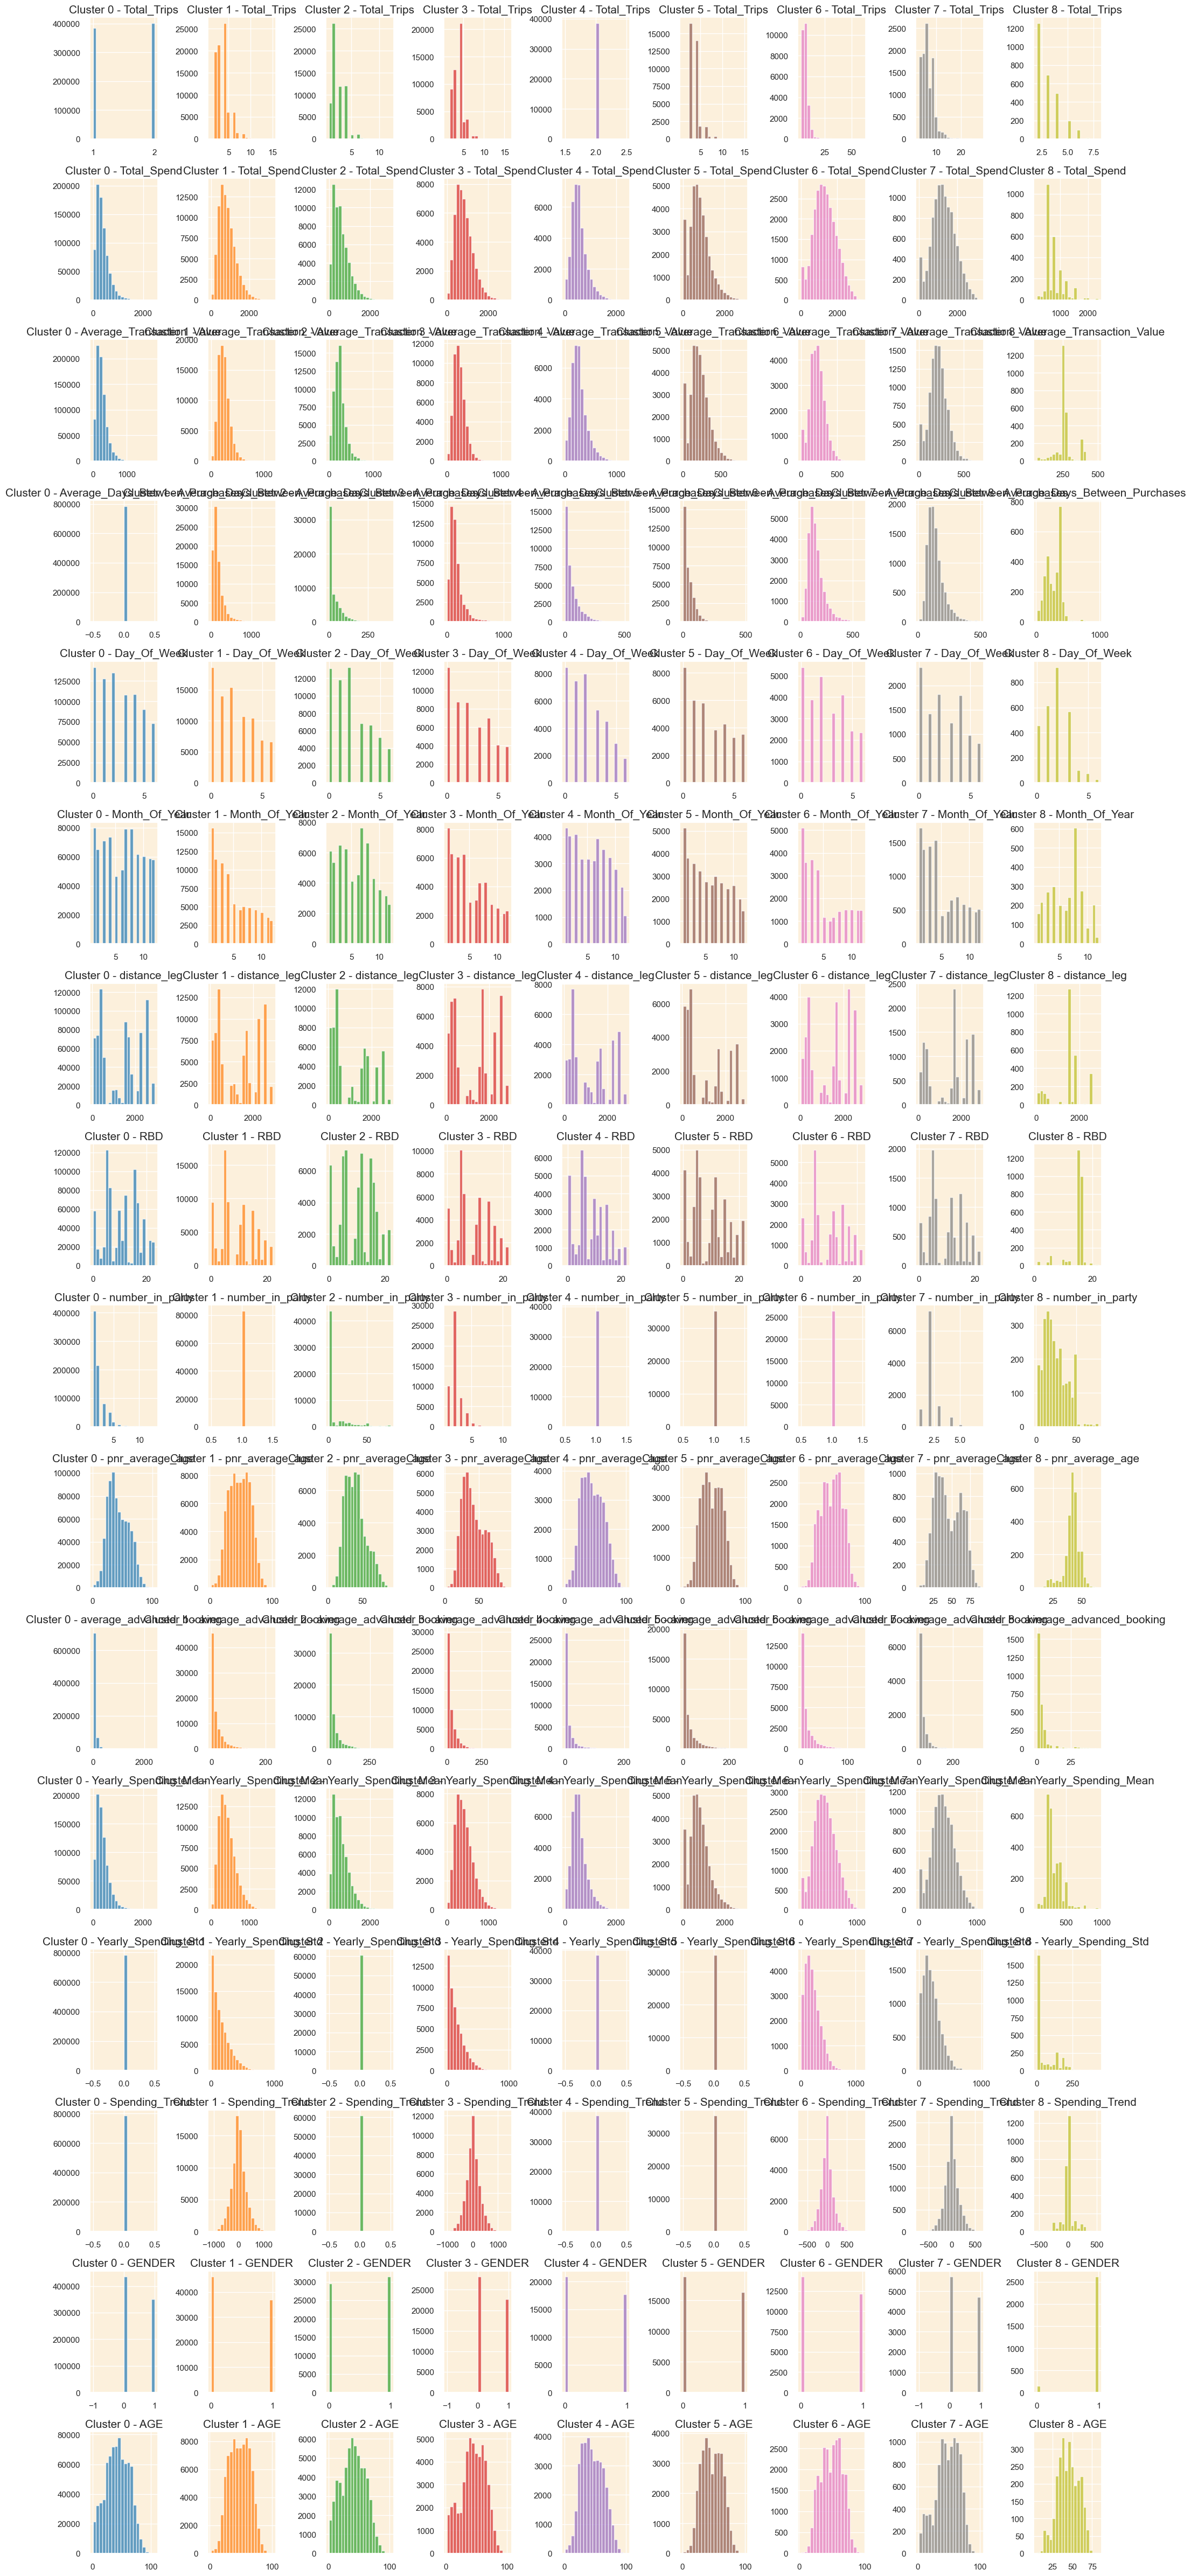

In [300]:

# Plot histograms for each feature segmented by the clusters
features = df_2024.columns[1:-1]
clusters = df_2024['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = df_2024[df_2024['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
<h2 align="left"><font color=#ff6200>Customer Profiles Derived from Radar Chart Analysis</font></h2>
    
<h3 align="left"><font color=blue>Cluster 0 (Blue Chart):</font></h3>

🎯 Profile: __Cluster 0__  

- Customers in this cluster tend to spend less (seen by the low total spend) with a lower number of trips.
- Customers here have slight tendency to travel later in the week and later months in the year.
- Customers tend to travel to closer islands/countries, indicated by a short distance_leg.
- Customers spending trend is low and total trips is low. This indicates spending levels might be decreasing over time and they rarely travel/travel with another airline.
- Customers tend to travel in a small party/solo
- Customers in this cluster are on the younger side
- Customers spending trend, although low, is stable as indicated by the low yearly_spending_std.
____
    
<h3 align="left"><font color=orange>Cluster 1 (Orange Chart):</font></h3>    
 
🎯 Profile: __Cluster 1__  
    
- Customer in this cluster tend to spend more, with a higher number of trips
- Customers tend to travel earlier in the year and week
- Customers tends to travel to further countries
- Customers have a very high spending travel, indicating that their spending has been increasing overtime.
- Customers average transaction value is relatively high, meaning that when they travel they tend to make substantial purchases.
- Customers tend to travel in large parties, indicating family/friend travel.
- Customers tend to book long in advance on average.
- Customers are on the older side of age.
- Customers in this cluster show a moderate level of spending, but their transactions are not very frequent, as indicated by the high Days_since_last_purchase and average_days_between_purchases.

____
    
<h3 align="left"><font color=green>Cluster 2 (Green Chart):</font></h3>   

🎯 Profile: __Cluster 2__
    
- Customers in this cluster tend to spend more (but less than cluster 1)
- Customers tend to travel earlier in the week and later in the year
- Customers tend to travel to further countries.
- Customers have a high spending trend, indicating their spending is increasing overtime
- Customers average_transaction_value is relatively high, meaning that when they travel, they tend to make substantial purchases.
- Customers tend to travel in large groups with a low pnr_average_age, indicating families.
- Customers tend to book long in advance.
- Customers in this cluster show a moderate level of spending, but their transactions are not very frequent as indicated by the high Days_since_last_purchase and average_days_between_purchases.
    
 ____
    
<h3 align="left"><font color=red>Cluster 3 (Red Chart):</font></h3>    
 
🎯 Profile: __Cluster 3__  
    
- Customers in this cluster tend to spend less and have fewer total trips
- Customers tend to travel later in the week and earlier in the year
- Customers tend to travel to close islands/countries
- Customers have a low spending trend and low number of trips, indicating that their spending levels might be decreasing overtime and they rarely travel/rarely travel with CAL
- Customers tend to travel in small parties/solo
- Customers are on the younger side
- Customers book short in advance

____
    
<h3 align="left"><font color=purple>Cluster 4 (Purple Chart):</font></h3>    
 
🎯 Profile: __Cluster 4__  
    
- Customer in this cluster show a moderate level of spending, but their transactions are relatively frequent as indicated by the low Days_since_last_purchase and average_days_between_purchases.
- Customers tend to travel early in the week and later in the year
- Customers have a moderate spending trend, indicating their spending is slowly increasing over time.
- Customers spending is relatively stable as indicated by the low yearly_spending_std
- Customers have a moderate average transactional value, indicating that when they travel, they spend a moderate amount of money.
- Customers tend to travel in moderate groups
- Customers tend to book a moderate number of days in advance.

____
    
<h3 align="left"><font color=brown>Cluster 5 (Brown Chart):</font></h3>    
 
🎯 Profile: __Cluster 5__  
    
- Same as cluster 4 except: Customers tend to travel later in the week and earlier in the year and cluster 5 also has more stable spending than cluster 4 and a higher spending trend than 4. All other attributies are relatively similar.
    
____
    
<h3 align="left"><font color=pink>Cluster 6 (Pink Chart):</font></h3>    
 
🎯 Profile: __Cluster 6__  
    
- Customers in this cluster show a very high total spend
- Their yearly spending shows high variability, indicating that their spending pattern might be less predictable compared to others.
- Travels early in the year and earlier in the week
- Customers have a low average transactional value, indicating that they spend less per trip
- Customers are on the younger side
- Customers tend to travel to closer islands/countries
- Customers tend to travel in a small party/solo
- Customers book very short in advance.
- Customers travels relatively frequent

____

<a id="results"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 11 | Results</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
<h2 align="left"><font color=#ff6200>Findings</font></h2>
    
<h3 align="left"><font color=blue>Cluster 0</font></h3>

🎯 Profile: __Budget Explorers__  

- Customers in this cluster are budget-conscious travelers who tend to spend less and take fewer trips. 
- They often travel solo or in small groups, preferring shorter trips to nearby destinations. 
- Their spending habits are stable but low, indicating a focus on economical travel choices.!
    
- These customers are likely more price-sensitive and may respond well to promotions or discounts.
- They could be targeted with budget-friendly travel packages or last-minute deals to encourage more frequent travel.
- Since they tend to travel in small groups or solo, offering single traveler discounts or small group packages could be effective.
____
 
<h3 align="left"><font color=orange>Cluster 1</font></h3>

🎯 Profile: __Luxury Travelers/High Spenders__  

- This cluster represents customers who spend generously on travel, taking frequent trips to distant destinations. - They tend to travel in larger groups, possibly with family or friends, and book their trips well in advance. - - - Their spending has been consistently increasing over time, and they often make high-value purchases during their travels
- These customers are likely more interested in high-end travel experiences and may value exclusivity.
- Targeting them with luxury travel packages, premium services, or unique experiences could be appealing.
- Since they book well in advance, offering early booking discounts or exclusive early access to new destinations could be effective.
____
    
<h3 align="left"><font color=green>Cluster 2 (Green Chart):</font></h3>   

🎯 Profile: __Trendy Explorers /Moderate Spenders__
    
- Customers in this cluster have a moderate to high spending level and tend to travel in larger groups, particularly families. 
- They book their trips in advance and prefer traveling to distant countries. 
- Their spending is increasing over time, indicating a growing interest in travel.
- These customers are in a middle ground between budget and luxury travelers.
- They may respond well to balanced travel packages that offer good value for money.
- Targeting them with promotions that emphasize value, such as all-inclusive packages or loyalty programs, could be effective.
    
____
 
<h3 align="left"><font color=red>Cluster 3 (Red Chart):</font></h3>    
 
🎯 Profile: __Casual Vacationers/Occasional Travelers__  
    
- This cluster includes customers who prefer short, casual vacations to nearby destinations. 
- They are budget-conscious and tend to travel solo or in small groups. 
- Their spending levels are low, and they book their trips on short notice.
- These customers may be occasional travelers or prefer shorter, more frequent trips.
- Targeting them with weekend getaway packages or short trip deals could be effective.
- Since they tend to travel closer to their dates, offering last-minute deals or flexible booking options could be appealing.

____ 
    
<h3 align="left"><font color=purple>Cluster 4 (Purple Chart):</font></h3>    
 
🎯 Profile: __Frequent Adventurers/Regular Travelers__  
    
- Customers in this cluster travel frequently and spend moderately on their trips. 
- They prefer traveling early in the week and later in the year, possibly for off-peak travel experiences. 
- Their spending is gradually increasing over time, and they tend to make regular, moderate-value purchases during their trips.
- These customers are likely more experienced travelers who value convenience and flexibility.
- Offering them loyalty rewards, frequent traveler benefits, or flexible booking options could be effective.
- Since they travel to various destinations throughout the year, offering diverse travel packages or multi-destination deals could be appealing.

____
    

<h3 align="left"><font color=brown>Cluster 5 (Brown Chart):</font></h3>    
 
🎯 Profile: __Stable Spenders/Seasoned Travelers__  
    
- Similar to Cluster 4, these customers travel frequently and spend moderately. 
- However, they prefer traveling later in the week and earlier in the year. 
- Their spending is stable and higher than Cluster 4, indicating a more consistent travel pattern.
- These customers have a more predictable spending pattern and may respond well to targeted promotions.
- Offering them personalized travel recommendations based on their past behavior could be effective.
- Since they travel later in the week and earlier in the year, offering off-peak travel discounts or mid-week specials could be appealing.
    
____
      
<h3 align="left"><font color=pink>Cluster 6 (Pink Chart):</font></h3>    
 
🎯 Profile: __Spontaneous Travelers/Explorers__  
    
- Customers in this cluster exhibit spontaneous travel behavior, booking trips on short notice. 
- They tend to spend less per trip but travel frequently.
- They prefer shorter trips to nearby destinations and often travel solo or in small groups.
- These customers are likely more impulsive in their travel decisions and may respond well to last-minute deals or flash sales.
- Offering them flexible booking options or exclusive last-minute discounts could be effective.
- Since they travel solo or in small groups, offering discounts for single travelers or small group packages could be appealing.

____  

